# Clusterización de jugadores

## K-MEANS

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

data = pd.read_csv('data/chess_data.csv')

# Obtener una lista única de identificadores de jugadores
jugadores = pd.unique(data[['white_id', 'black_id']].values.ravel('K'))

caracteristicas_lista = []

# Iterar sobre cada jugador y calcular características promedio
for jugador in jugadores:
    # Filtrar las partidas en las que el jugador es blanco o negro
    partidas_blancas = data[data['white_id'] == jugador]
    partidas_negras = data[data['black_id'] == jugador]
    
    # Calcular tasa de victorias (porcentaje de partidas ganadas)
    total_partidas = len(partidas_blancas) + len(partidas_negras)
    total_victorias = (
        len(partidas_blancas[partidas_blancas['winner'] == 'white']) +
        len(partidas_negras[partidas_negras['winner'] == 'black'])
    )
    
    tasa_victorias = (total_victorias / total_partidas) * 100 if total_partidas > 0 else 0
    
    # Obtener la apertura más frecuente
    apertura_frecuente = (
        partidas_blancas['opening_name'].mode().iloc[0] if not partidas_blancas.empty else
        partidas_negras['opening_name'].mode().iloc[0] if not partidas_negras.empty else
        'N/A'
    )
    white_mean = partidas_blancas['white_rating'].mean()
    black_mean = partidas_negras['black_rating'].mean()
    avg_rating = (white_mean + black_mean) / 2 if not np.isnan(white_mean) and not np.isnan(black_mean) else white_mean if not np.isnan(white_mean) else black_mean

    turns_mean = (partidas_blancas['turns'].mean() + partidas_negras['turns'].mean()) / 2 \
    if not np.isnan(partidas_blancas['turns'].mean()) and not np.isnan(partidas_negras['turns'].mean()) \
    else partidas_blancas['turns'].mean() if not np.isnan(partidas_blancas['turns'].mean()) \
    else partidas_negras['turns'].mean()

    opening_ply_mean = (partidas_blancas['opening_ply'].mean() + partidas_negras['opening_ply'].mean()) / 2 \
    if not np.isnan(partidas_blancas['opening_ply'].mean()) and not np.isnan(partidas_negras['opening_ply'].mean()) \
    else partidas_blancas['opening_ply'].mean() if not np.isnan(partidas_blancas['opening_ply'].mean()) \
    else partidas_negras['opening_ply'].mean()

    caracteristicas = {
        'id': jugador,
        'tasa_victorias': tasa_victorias,
        'total_partidas': total_partidas,
        'most_frequent_opening': apertura_frecuente,
        'avg_rating': avg_rating,
        'avg_turns': turns_mean,
        'avg_opening_ply': opening_ply_mean,
    }
    
    caracteristicas_lista.append(caracteristicas)

caracteristicas_jugadores = pd.DataFrame(caracteristicas_lista)

numeric_columns = ['tasa_victorias', 'total_partidas', 'avg_rating', 'avg_turns', 'avg_opening_ply']
categorical_columns = ['most_frequent_opening']

# 1. Normalización de datos
X_numeric = caracteristicas_jugadores[numeric_columns]

from sklearn.impute import SimpleImputer

# 1. Imputación de valores faltantes en datos numéricos
imputer = SimpleImputer(strategy='mean')
X_numeric_imputed = pd.DataFrame(imputer.fit_transform(X_numeric), columns=numeric_columns)

# 2. Normalización de datos
scaler = StandardScaler()
X_numeric_normalized = scaler.fit_transform(X_numeric_imputed)

# 2. Codificación de variables categóricas y creación de variables dummy
X_categorical = caracteristicas_jugadores[categorical_columns]
X_categorical_encoded = pd.get_dummies(X_categorical)

# 3. Concatenar las variables numéricas normalizadas y las categóricas codificadas
X_for_kmeans = pd.concat([pd.DataFrame(X_numeric_normalized, columns=numeric_columns), X_categorical_encoded], axis=1)

# 4. Aplicar K-Means a las características seleccionadas
NUM_CLUSTERS = 3 
kmeans_model = KMeans(n_clusters=NUM_CLUSTERS, random_state=42)
caracteristicas_jugadores['cluster'] = kmeans_model.fit_predict(X_for_kmeans)

print(caracteristicas_jugadores[['cluster', *numeric_columns, *categorical_columns]])




/home/angela/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


       cluster  tasa_victorias  total_partidas  avg_rating  avg_turns  \
0            1      100.000000               1     1500.00       13.0   
1            0        0.000000               3     1333.75       26.5   
2            1      100.000000               1     1496.00       61.0   
3            1      100.000000               5     1405.40       62.2   
4            1       66.666667               3     1524.00       98.0   
...        ...             ...             ...         ...        ...   
15630        0        0.000000               1     1201.00       70.0   
15631        0        0.000000               1     1142.00        9.0   
15632        1      100.000000               1     1196.00       82.0   
15633        0        0.000000               1     1286.00       35.0   
15634        1      100.000000               1     1339.00       78.0   

       avg_opening_ply                      most_frequent_opening  
0                  5.0           Slav Defense: Exchange

# Nº óptimo de clusters por el método de la silueta

El método de la silueta calcula la media de los coeficientes de silueta de todas las observaciones para diferentes valores de k. El número óptimo de clústers k es aquel que maximiza la media de los coeficientes de silueta para un rango de valores de k.

/home/angela/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/angela/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/angela/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/angela/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' 

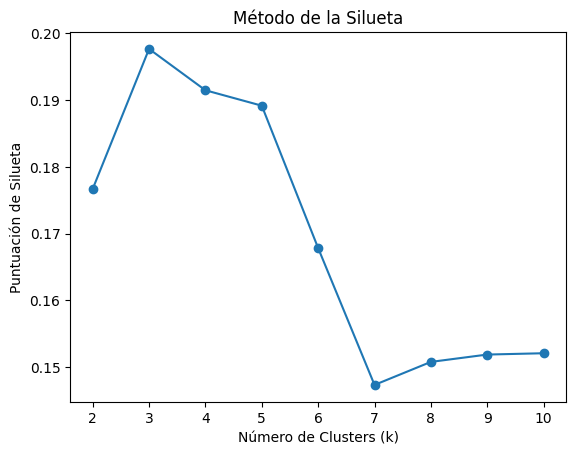

In [3]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

silhouette_scores = []

# Probamos con diferentes valores de k (por ejemplo, de 2 a 10)
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_for_kmeans)
    silhouette_scores.append(silhouette_score(X_for_kmeans, labels))

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Puntuación de Silueta')
plt.title('Método de la Silueta')
plt.show()



El nº de clusters que maximiza la puntuación de la silueta suele ser una buena opción. En este caso, 9.

## Clusterización con el nº óptimo

In [4]:
# 4. Aplicar K-Means a las características seleccionadas
NUM_CLUSTERS = 3  
kmeans_model = KMeans(n_clusters=NUM_CLUSTERS, random_state=42)
caracteristicas_jugadores['cluster'] = kmeans_model.fit_predict(X_for_kmeans)

print(caracteristicas_jugadores[['cluster', *numeric_columns, *categorical_columns]])

/home/angela/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


       cluster  tasa_victorias  total_partidas  avg_rating  avg_turns  \
0            1      100.000000               1     1500.00       13.0   
1            0        0.000000               3     1333.75       26.5   
2            1      100.000000               1     1496.00       61.0   
3            1      100.000000               5     1405.40       62.2   
4            1       66.666667               3     1524.00       98.0   
...        ...             ...             ...         ...        ...   
15630        0        0.000000               1     1201.00       70.0   
15631        0        0.000000               1     1142.00        9.0   
15632        1      100.000000               1     1196.00       82.0   
15633        0        0.000000               1     1286.00       35.0   
15634        1      100.000000               1     1339.00       78.0   

       avg_opening_ply                      most_frequent_opening  
0                  5.0           Slav Defense: Exchange

### Nº jugadores en cada cluster

In [5]:
cluster_sizes = caracteristicas_jugadores['cluster'].value_counts()
print(cluster_sizes)


cluster
0    7724
1    7468
2     443
Name: count, dtype: int64


### 'tasa_victorias' respecto a 'avg_rating' por cluster

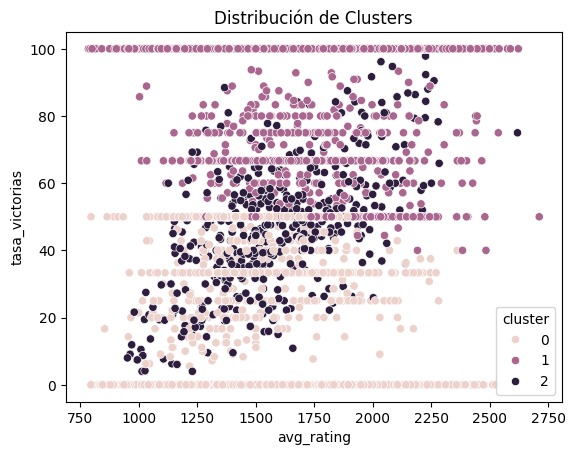

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns


# Visualización de la tasa de victorias en función del rating promedio por cluster
sns.scatterplot(x='avg_rating', y='tasa_victorias', hue='cluster', data=caracteristicas_jugadores)
plt.title('Distribución de Clusters')
plt.show()


In [7]:
# Verificar la cantidad de clusters únicos
print(caracteristicas_jugadores['cluster'].nunique())


3


Están todas muy cruzadas, deberíamos realizar un análisis de importancias de características.

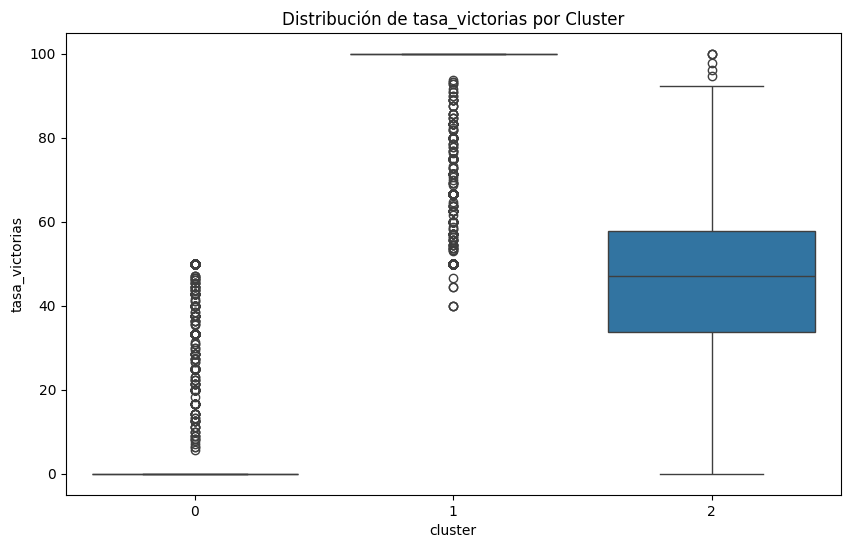

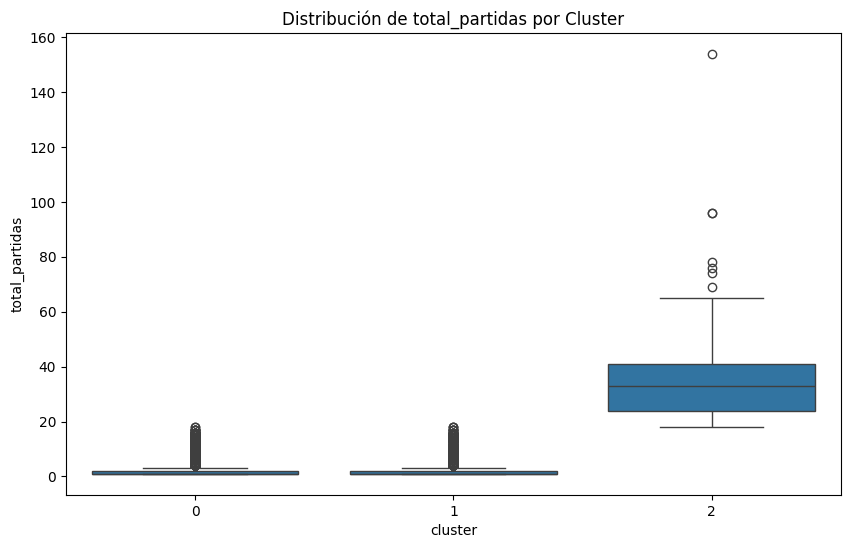

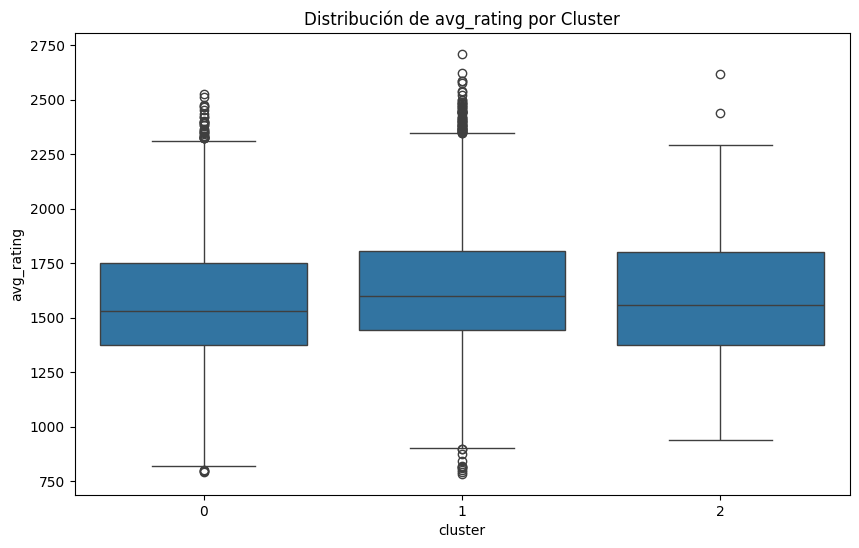

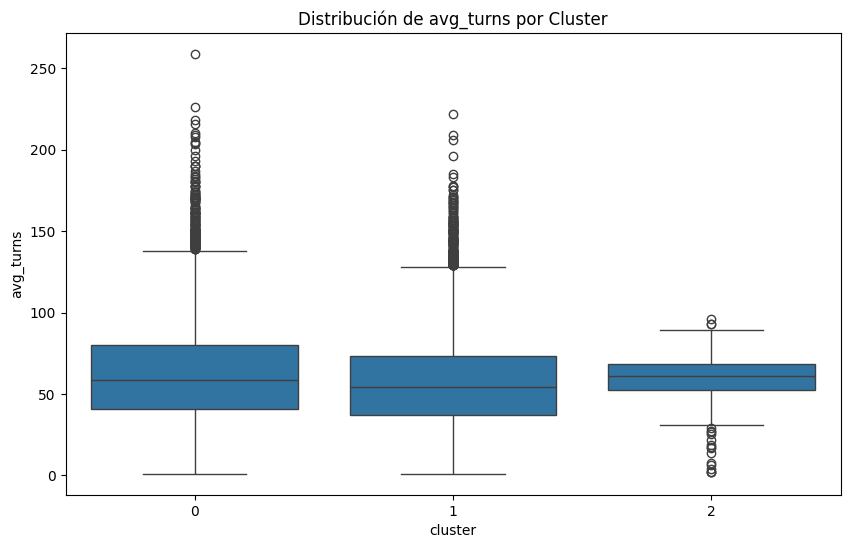

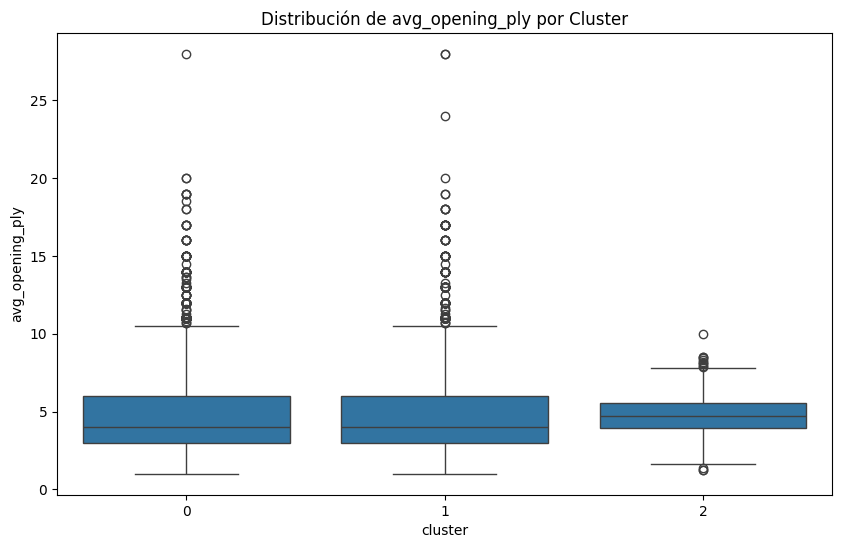

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Variables numéricas
numeric_columns = ['tasa_victorias', 'total_partidas', 'avg_rating', 'avg_turns', 'avg_opening_ply']

# Estadísticas descriptivas por cluster para variables numéricas
cluster_stats_numeric = caracteristicas_jugadores.groupby('cluster')[numeric_columns].describe()

# Visualización de boxplots para variables numéricas por cluster
for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='cluster', y=column, data=caracteristicas_jugadores)
    plt.title(f'Distribución de {column} por Cluster')
    plt.show()


In [10]:
mean_avg_turns = cluster_stats_numeric['avg_turns']['mean']
print(mean_avg_turns)


cluster
0    63.196982
1    57.757625
2    59.650511
Name: mean, dtype: float64


In [133]:
print(cluster_stats_numeric)

        tasa_victorias                                                      \
                 count       mean        std   min         25%         50%   
cluster                                                                      
0               7724.0   4.973137  13.725868   0.0    0.000000    0.000000   
1               7468.0  94.899326  13.914686  40.0  100.000000  100.000000   
2                443.0  46.330916  19.864910   0.0   33.687943   47.058824   

                           total_partidas             ...  avg_turns          \
                75%    max          count       mean  ...        75%     max   
cluster                                               ...                      
0          0.000000   50.0         7724.0   1.695495  ...  80.000000  259.00   
1        100.000000  100.0         7468.0   1.614890  ...  73.500000  222.00   
2         57.836257  100.0          443.0  33.769752  ...  68.133523   95.99   

        avg_opening_ply                           

## Matriz de correlación entre las variables

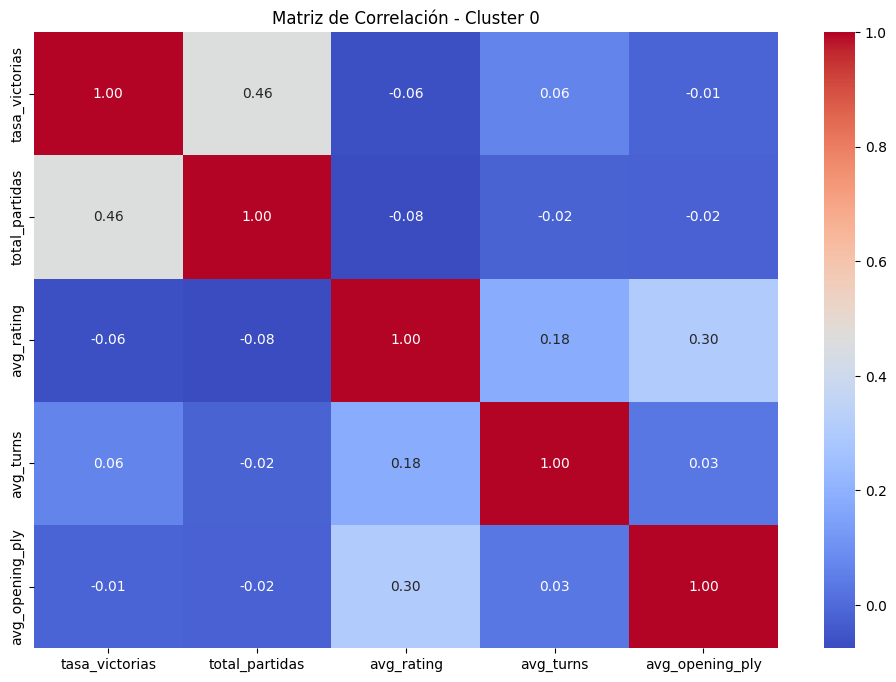

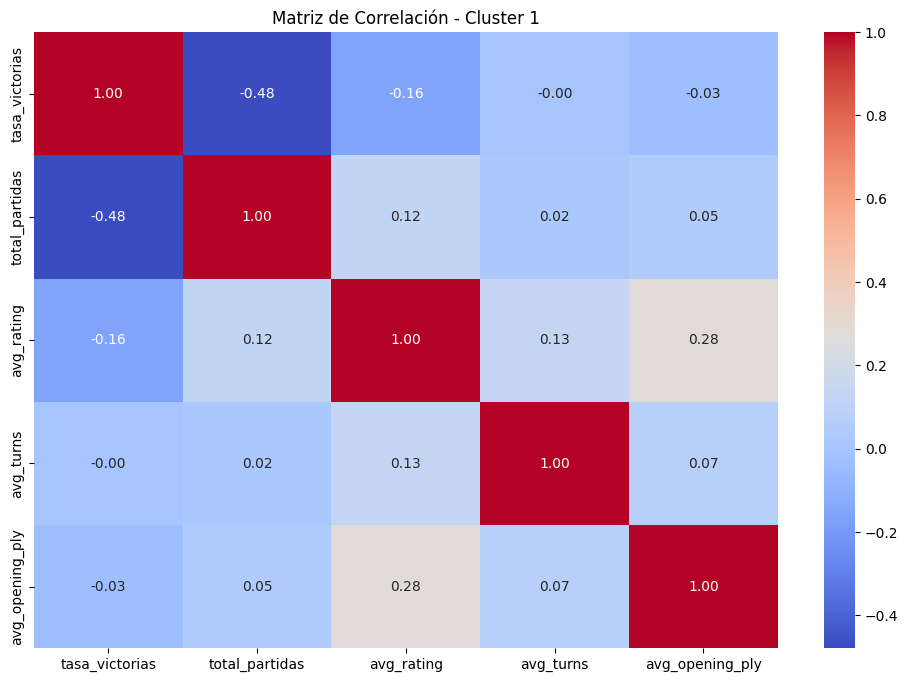

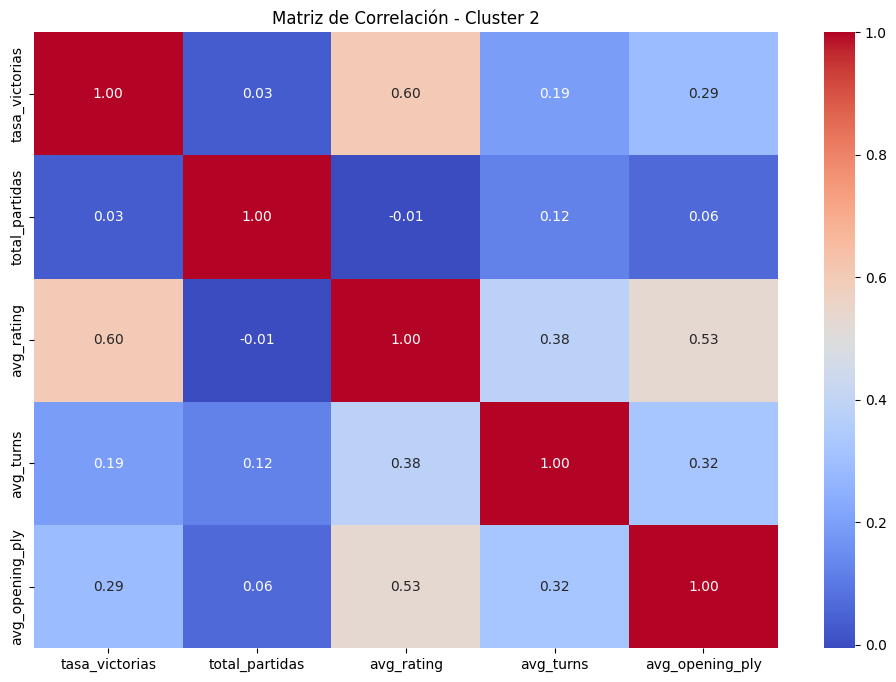

In [135]:
for cluster_id in range(0,3):
    cluster_data = caracteristicas_jugadores[caracteristicas_jugadores['cluster'] == cluster_id]
    correlation_matrix = cluster_data[numeric_columns].corr()

    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Matriz de Correlación - Cluster {cluster_id}')
    plt.show()


## Aperturas más frecuentes por cluster

In [11]:
# Estadísticas descriptivas por cluster para variables numéricas
cluster_stats_numeric = caracteristicas_jugadores.groupby('cluster')[numeric_columns].describe()

# Aperturas más frecuentes por cluster
cluster_most_frequent_openings = caracteristicas_jugadores.groupby('cluster')['most_frequent_opening'].value_counts().unstack()

print("Estadísticas descriptivas por cluster para variables numéricas:")
print(cluster_stats_numeric)

print("\nAperturas más frecuentes por cluster:")
print(cluster_most_frequent_openings)


Estadísticas descriptivas por cluster para variables numéricas:
        tasa_victorias                                                      \
                 count       mean        std   min         25%         50%   
cluster                                                                      
0               7724.0   4.973137  13.725868   0.0    0.000000    0.000000   
1               7468.0  94.899326  13.914686  40.0  100.000000  100.000000   
2                443.0  46.330916  19.864910   0.0   33.687943   47.058824   

                           total_partidas             ...  avg_turns          \
                75%    max          count       mean  ...        75%     max   
cluster                                               ...                      
0          0.000000   50.0         7724.0   1.695495  ...  80.000000  259.00   
1        100.000000  100.0         7468.0   1.614890  ...  73.500000  222.00   
2         57.836257  100.0          443.0  33.769752  ...  68.13352

In [ ]:
# Calcular la desviación estándar de la proporción de frecuencia entre clusters
std_deviation_between_clusters = cluster_most_frequent_openings_ratio.std(axis=0)

# Ordenar las aperturas por su desviación estándar en orden descendente
distinctive_openings = std_deviation_between_clusters.sort_values(ascending=False).index

print("\nAperturas más distintivas por cluster:")
for opening in distinctive_openings:
    print(f"Apertura: {opening}")
    for cluster in cluster_most_frequent_openings_ratio.index:
        print(f"  Cluster {cluster}: {cluster_most_frequent_openings_ratio.loc[cluster, opening]:.5f}")
    print()


## Análisis de aperturas distintivas:

In [20]:
# Configurar pandas para mostrar todos los datos
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Calcular la proporción de aperturas más frecuentes por cluster
cluster_opening_ratios = cluster_most_frequent_openings.div(cluster_most_frequent_openings.sum(axis=1), axis=0)

# Calcular la proporción promedio de aperturas en general
average_opening_ratios = cluster_most_frequent_openings.sum(axis=0) / cluster_most_frequent_openings.sum().sum()

# Encontrar aperturas distintivas para cada cluster
distinctive_openings = cluster_opening_ratios.sub(average_opening_ratios, axis=1).abs().sort_values(by=0, axis=1, ascending=False)

# Imprimir aperturas distintivas para cada cluster ordenadas por tasa de mayor a menor
for i in range(3):
    print(f"\nAperturas distintivas para el Cluster {i} (ordenadas por tasa de mayor a menor):")
    cluster_openings = distinctive_openings.loc[i]
    sorted_openings = cluster_openings[cluster_openings > 0].sort_values(ascending=False)
    print(sorted_openings)

# Restaurar la configuración predeterminada de pandas
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')




Aperturas distintivas para el Cluster 0 (ordenadas por tasa de mayor a menor):
most_frequent_opening
Scotch Game                                                                                    0.002547
Scandinavian Defense                                                                           0.001740
French Defense: Advance Variation |  Nimzowitsch System                                        0.001324
Bishop's Opening                                                                               0.001270
Sicilian Defense: Bowdler Attack                                                               0.001215
Philidor Defense #2                                                                            0.001040
Modern Defense                                                                                 0.001004
Robatsch (Modern) Defense                                                                      0.000992
Queen's Pawn Game: Mason Attack                                   

In [23]:
# Calcular la diversidad de aperturas para cada cluster
opening_diversity = cluster_most_frequent_openings.apply(lambda x: x[x > 0].count(), axis=1)

for i in range(3):
    print(f"\nDiversidad de aperturas para el Cluster {i}: {opening_diversity[i]}")



Diversidad de aperturas para el Cluster 0: 1128

Diversidad de aperturas para el Cluster 1: 1058

Diversidad de aperturas para el Cluster 2: 202


### Histogramas

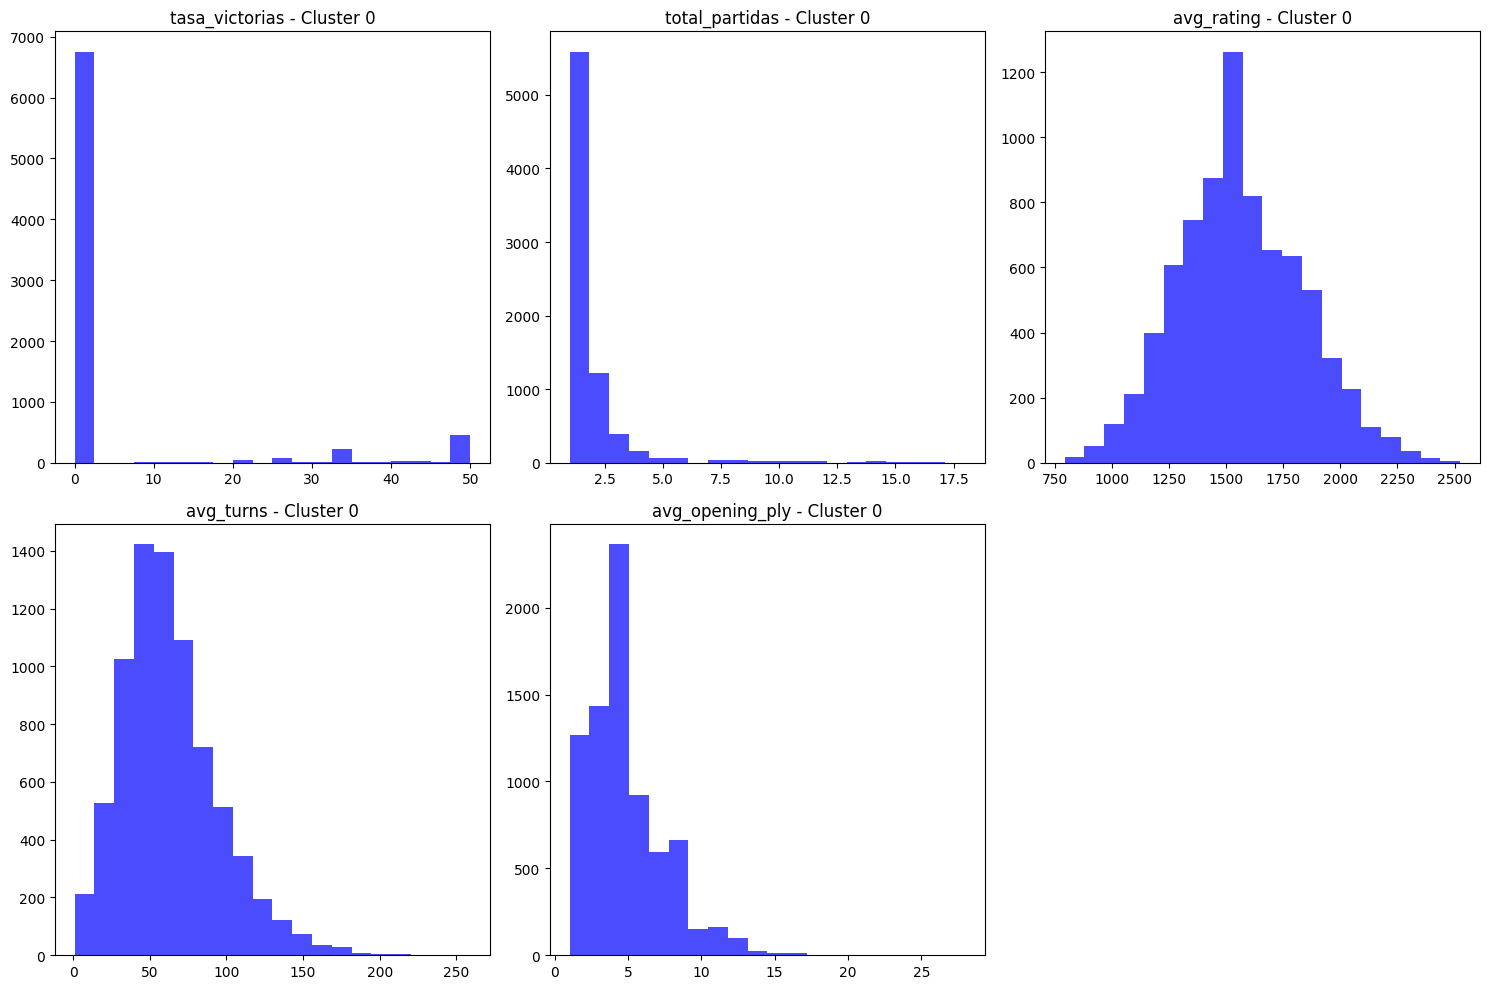

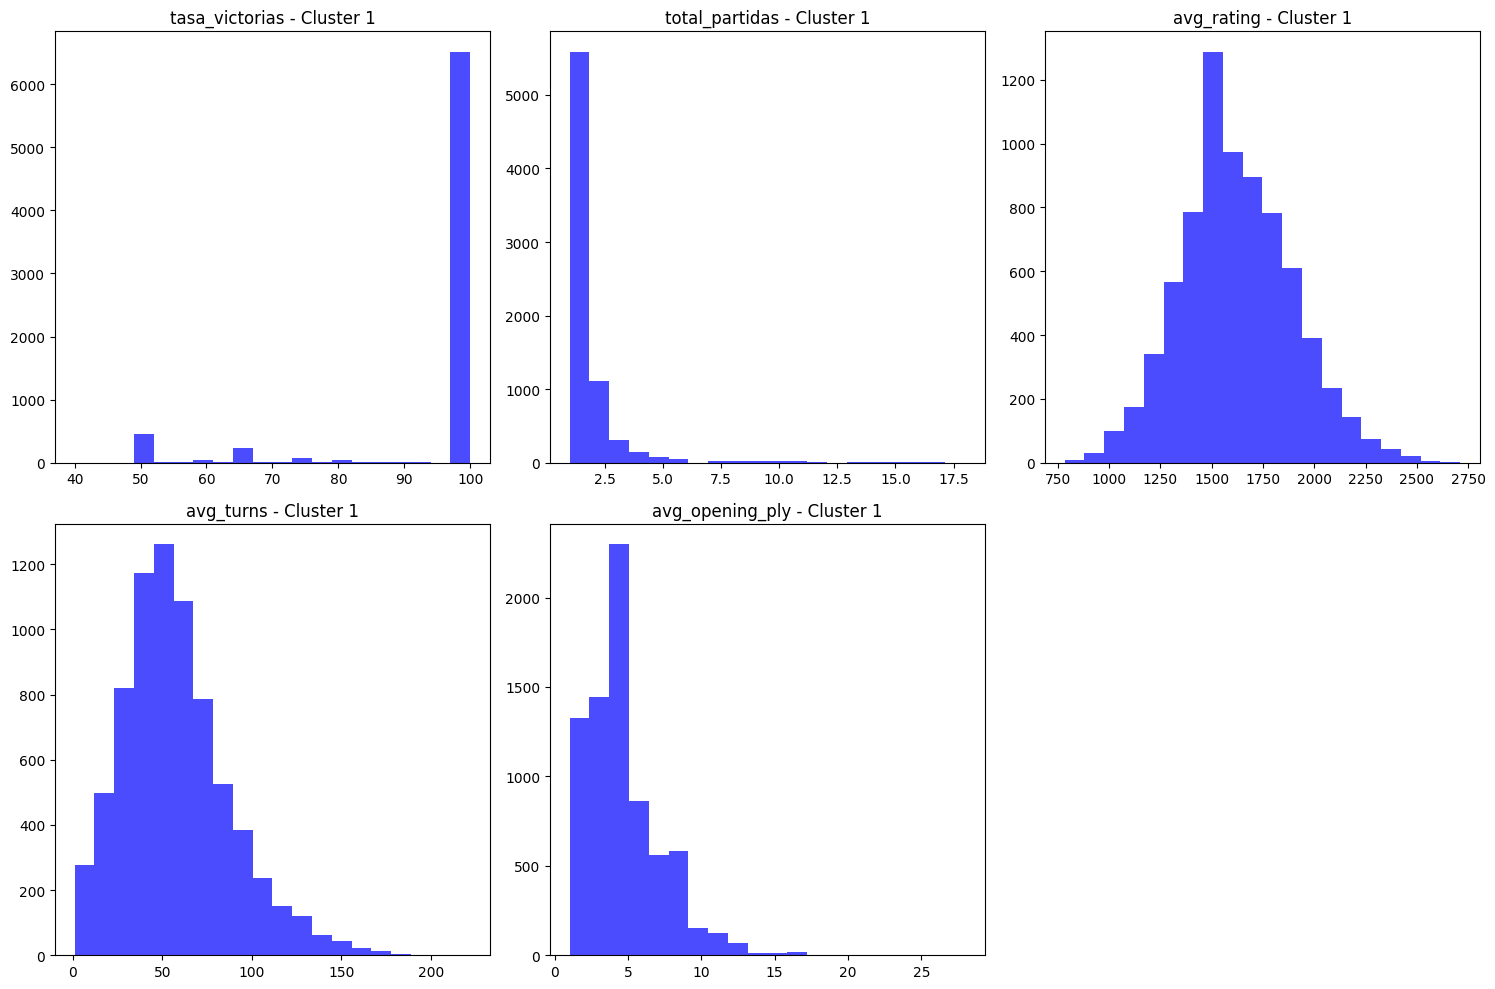

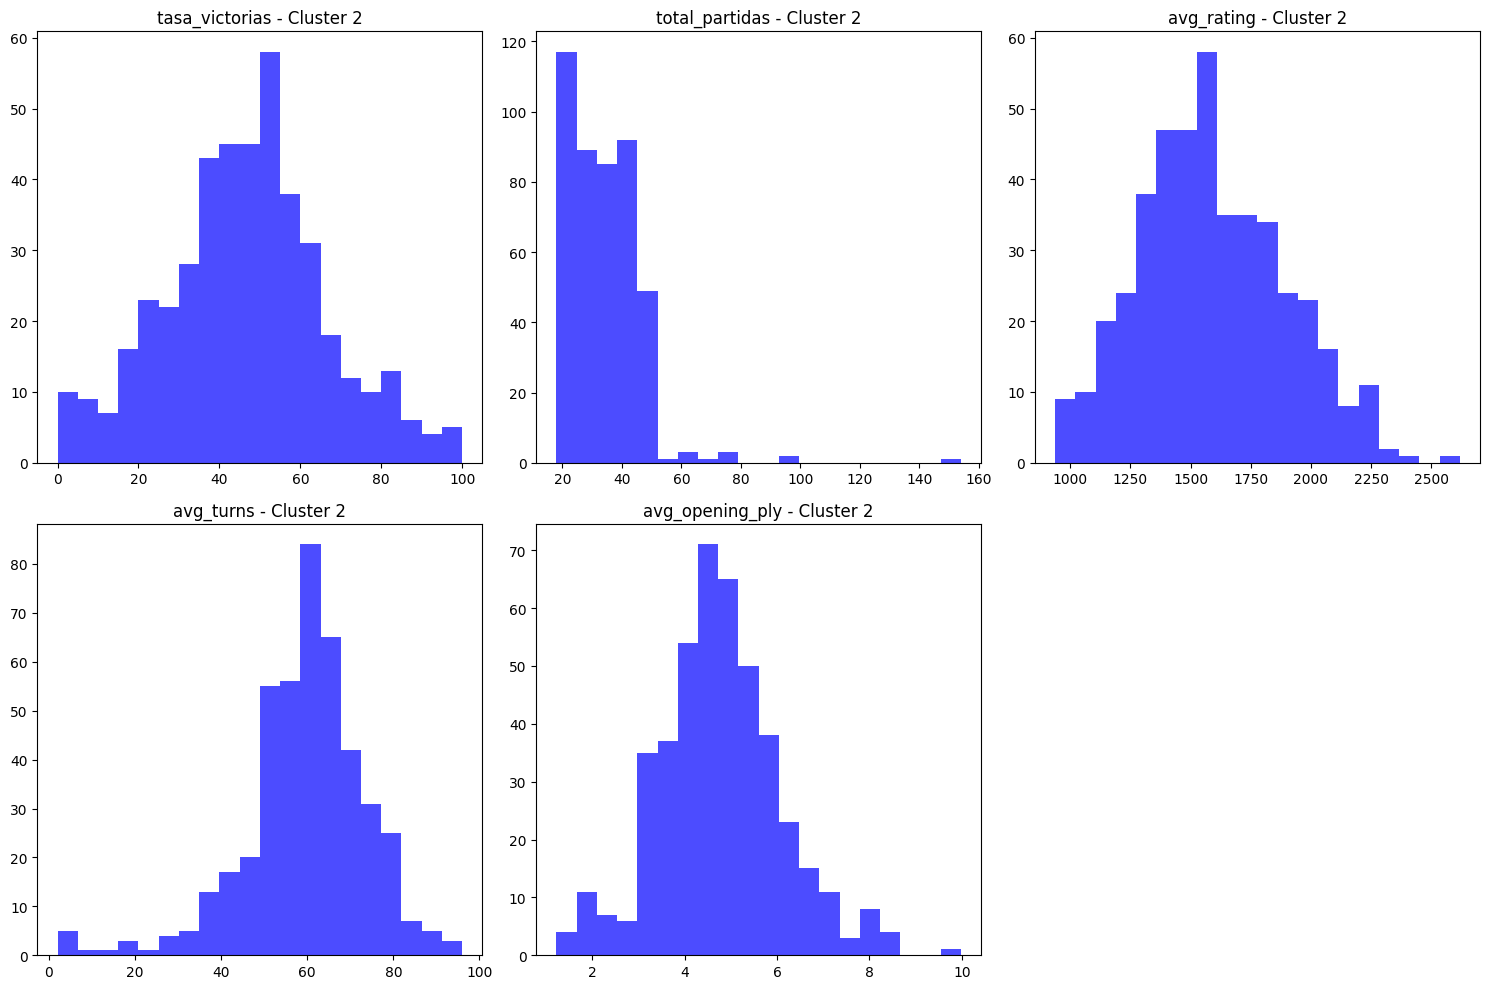

In [24]:
import matplotlib.pyplot as plt


numeric_columns = ['tasa_victorias', 'total_partidas', 'avg_rating', 'avg_turns', 'avg_opening_ply']

for cluster in range(NUM_CLUSTERS):
    # Filtrar datos por cluster
    datos_cluster = caracteristicas_jugadores[caracteristicas_jugadores['cluster'] == cluster]
    plt.figure(figsize=(15, 10))
    rows, cols = 2, 3
    i = 1

    for column in numeric_columns:
        plt.subplot(rows, cols, i)
        plt.hist(datos_cluster[column], bins=20, color='blue', alpha=0.7)
        plt.title(f'{column} - Cluster {cluster}')
        i += 1

    plt.tight_layout()
    plt.show()


## Tests ANOVA, Kruskal-Wallis y chi

Observados los histogramas, aplicaremos test A

### tasa_victorias, Kruskal-Wallis

In [25]:
from scipy.stats import kruskal

# Realiza el test de Kruskal-Wallis
kruskal_result = kruskal(*[caracteristicas_jugadores[caracteristicas_jugadores['cluster'] == i]['tasa_victorias'] for i in range(NUM_CLUSTERS)])
print("Resultados del test de Kruskal-Wallis:")
print("Estadístico de prueba:", kruskal_result.statistic)
print("Valor p:", kruskal_result.pvalue)

alpha = 0.05
if kruskal_result.pvalue < alpha:
    print("Hay evidencia suficiente para rechazar la hipótesis nula.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")



Resultados del test de Kruskal-Wallis:
Estadístico de prueba: 13981.181107754235
Valor p: 0.0
Hay evidencia suficiente para rechazar la hipótesis nula.


### total_partidas

In [26]:
from scipy.stats import kruskal

# test de Kruskal-Wallis
kruskal_result = kruskal(*[caracteristicas_jugadores[caracteristicas_jugadores['cluster'] == i]['total_partidas'] for i in range(NUM_CLUSTERS)])

print("Resultados del test de Kruskal-Wallis:")
print("Estadístico de prueba:", kruskal_result.statistic)
print("Valor p:", kruskal_result.pvalue)

# prueba de significancia
alpha = 0.05
if kruskal_result.pvalue < alpha:
    print("Hay evidencia suficiente para rechazar la hipótesis nula.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")


Resultados del test de Kruskal-Wallis:
Estadístico de prueba: 2054.499020984484
Valor p: 0.0
Hay evidencia suficiente para rechazar la hipótesis nula.


### most_frequent_opening  (chi)

In [72]:

import pandas as pd
from scipy.stats import chi2_contingency
# Create a contingency table
contingency_table = pd.crosstab(caracteristicas_jugadores['cluster'], caracteristicas_jugadores['most_frequent_opening'])
# Perform the chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

print(f"Chi-squared value: {chi2}")
print(f"P-value: {p}")

# Check if the result is statistically significant 
if p < 0.05:
    print("The difference in most_frequent_opening across clusters is statistically significant.")
else:
    print("There is no significant difference in most_frequent_opening across clusters.")


Chi-squared value: 21687.530436731402
P-value: 0.0
The difference in most_frequent_opening across clusters is statistically significant.


### avg_rating

In [97]:
from scipy.stats import f_oneway

# Realizar el test ANOVA para características numéricas
anova_result = f_oneway(*[caracteristicas_jugadores[caracteristicas_jugadores['cluster'] == i]['avg_rating'] for i in range(NUM_CLUSTERS)])
print("Resultados del test ANOVA:")
print(anova_result)

Resultados del test ANOVA:
F_onewayResult(statistic=90.00613089764745, pvalue=1.3620374132421976e-39)


### avg_turns

In [98]:
from scipy.stats import f_oneway

# Realizar el test ANOVA para características numéricas
anova_result = f_oneway(*[caracteristicas_jugadores[caracteristicas_jugadores['cluster'] == i]['avg_turns'] for i in range(NUM_CLUSTERS)])
print("Resultados del test ANOVA:")
print(anova_result)

Resultados del test ANOVA:
F_onewayResult(statistic=60.538496223799655, pvalue=6.453010989120413e-27)


### avg_opening_ply

In [157]:
from scipy.stats import kruskal
# test de Kruskal-Wallis
NUM_CLUSTERS=3
kruskal_result = kruskal(*[caracteristicas_jugadores[caracteristicas_jugadores['cluster'] == i]['avg_opening_ply'] for i in range(NUM_CLUSTERS)])

print("Resultados del test de Kruskal-Wallis:")
print("Estadístico de prueba:", kruskal_result.statistic)
print("Valor p:", kruskal_result.pvalue)

# prueba de significancia
alpha = 0.05
if kruskal_result.pvalue < alpha:
    print("Hay evidencia suficiente para rechazar la hipótesis nula.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")

Resultados del test de Kruskal-Wallis:
Estadístico de prueba: 25.836959274799867
Valor p: 2.45231118465104e-06
Hay evidencia suficiente para rechazar la hipótesis nula.


In [155]:
import pandas as pd

# 1. Verificar datos faltantes
missing_data = caracteristicas_jugadores['avg_turns'].isnull().sum()
print(f'Datos faltantes en "avg_turns": {missing_data}')

# 2. Verificar la varianza
variance_check = caracteristicas_jugadores.groupby('cluster')['avg_turns'].var()
print(f'Varianza por cluster:\n{variance_check}')

# 3. Verificar el número de datos en cada grupo
group_sizes = caracteristicas_jugadores['cluster'].value_counts()
print(f'Número de datos por cluster:\n{group_sizes}')

# 4. Verificar estadísticas descriptivas para identificar posibles problemas
descriptive_stats = caracteristicas_jugadores.groupby('cluster')['avg_turns'].describe()
print(f'Estadísticas descriptivas por cluster:\n{descriptive_stats}')

# 5. Verificar valores únicos y tipos de datos
unique_values = caracteristicas_jugadores['avg_turns'].unique()
data_types = caracteristicas_jugadores.dtypes
print(f'Valores únicos en "avg_turns": {unique_values}')
print(f'Tipos de datos en el DataFrame:\n{data_types}')
print(caracteristicas_jugadores.head())

Datos faltantes en "avg_turns": 0
Varianza por cluster:
cluster
0    1006.330923
1     895.236187
2     202.317292
Name: avg_turns, dtype: float64
Número de datos por cluster:
cluster
0    7724
1    7468
2     443
Name: count, dtype: int64
Estadísticas descriptivas por cluster:
          count       mean        std  min        25%        50%        75%  \
cluster                                                                       
0        7724.0  63.196982  31.722719  1.0  41.000000  58.375000  80.000000   
1        7468.0  57.757625  29.920498  1.0  37.000000  54.000000  73.500000   
2         443.0  59.650511  14.223828  2.0  52.718615  60.731884  68.133523   

            max  
cluster          
0        259.00  
1        222.00  
2         95.99  
Valores únicos en "avg_turns": [ 13.          26.5         61.         ... 187.         108.5
  60.66666667]
Tipos de datos en el DataFrame:
id                         object
tasa_victorias            float64
total_partidas            

In [142]:
import pandas as pd

# 1. Verificar datos faltantes
missing_data = caracteristicas_jugadores['avg_opening_ply'].isnull().sum()
print(f'Datos faltantes en "avg_opening_ply": {missing_data}')

# 2. Verificar la varianza
variance_check = caracteristicas_jugadores.groupby('cluster')['avg_opening_ply'].var()
print(f'Varianza por cluster:\n{variance_check}')

# 3. Verificar el número de datos en cada grupo
group_sizes = caracteristicas_jugadores['cluster'].value_counts()
print(f'Número de datos por cluster:\n{group_sizes}')

# 4. Verificar estadísticas descriptivas para identificar posibles problemas
descriptive_stats = caracteristicas_jugadores.groupby('cluster')['avg_opening_ply'].describe()
print(f'Estadísticas descriptivas por cluster:\n{descriptive_stats}')

# 5. Verificar valores únicos y tipos de datos
unique_values = caracteristicas_jugadores['avg_opening_ply'].unique()
data_types = caracteristicas_jugadores.dtypes
print(f'Valores únicos en "avg_opening_ply": {unique_values}')
print(f'Tipos de datos en el DataFrame:\n{data_types}')
print(caracteristicas_jugadores.head())

Datos faltantes en "avg_opening_ply": 0
Varianza por cluster:
cluster
0    6.899672
1    6.646002
2    1.758286
Name: avg_opening_ply, dtype: float64
Número de datos por cluster:
cluster
0    7724
1    7468
2     443
Name: count, dtype: int64
Estadísticas descriptivas por cluster:
          count      mean       std       min       25%       50%       75%  \
cluster                                                                       
0        7724.0  4.886632  2.626723  1.000000  3.000000  4.000000  6.000000   
1        7468.0  4.730970  2.577984  1.000000  3.000000  4.000000  6.000000   
2         443.0  4.756376  1.326004  1.225275  3.947949  4.681818  5.518492   

               max  
cluster             
0        28.000000  
1        28.000000  
2         9.982143  
Valores únicos en "avg_opening_ply": [ 5.          4.          3.          5.4         6.         10.
  5.1         7.16666667  2.          2.5         4.5         8.
  3.5         7.5         6.07142857  5.5         

In [143]:
print(cluster_most_frequent_openings.describe())


most_frequent_opening  Alekhine Defense  Alekhine Defense #2  \
count                          3.000000             3.000000   
mean                          14.333333             1.333333   
std                           12.503333             0.577350   
min                            2.000000             1.000000   
25%                            8.000000             1.000000   
50%                           14.000000             1.000000   
75%                           20.500000             1.500000   
max                           27.000000             2.000000   

most_frequent_opening  Alekhine Defense #3  \
count                                  1.0   
mean                                   1.0   
std                                    NaN   
min                                    1.0   
25%                                    1.0   
50%                                    1.0   
75%                                    1.0   
max                                    1.0   

most_fre

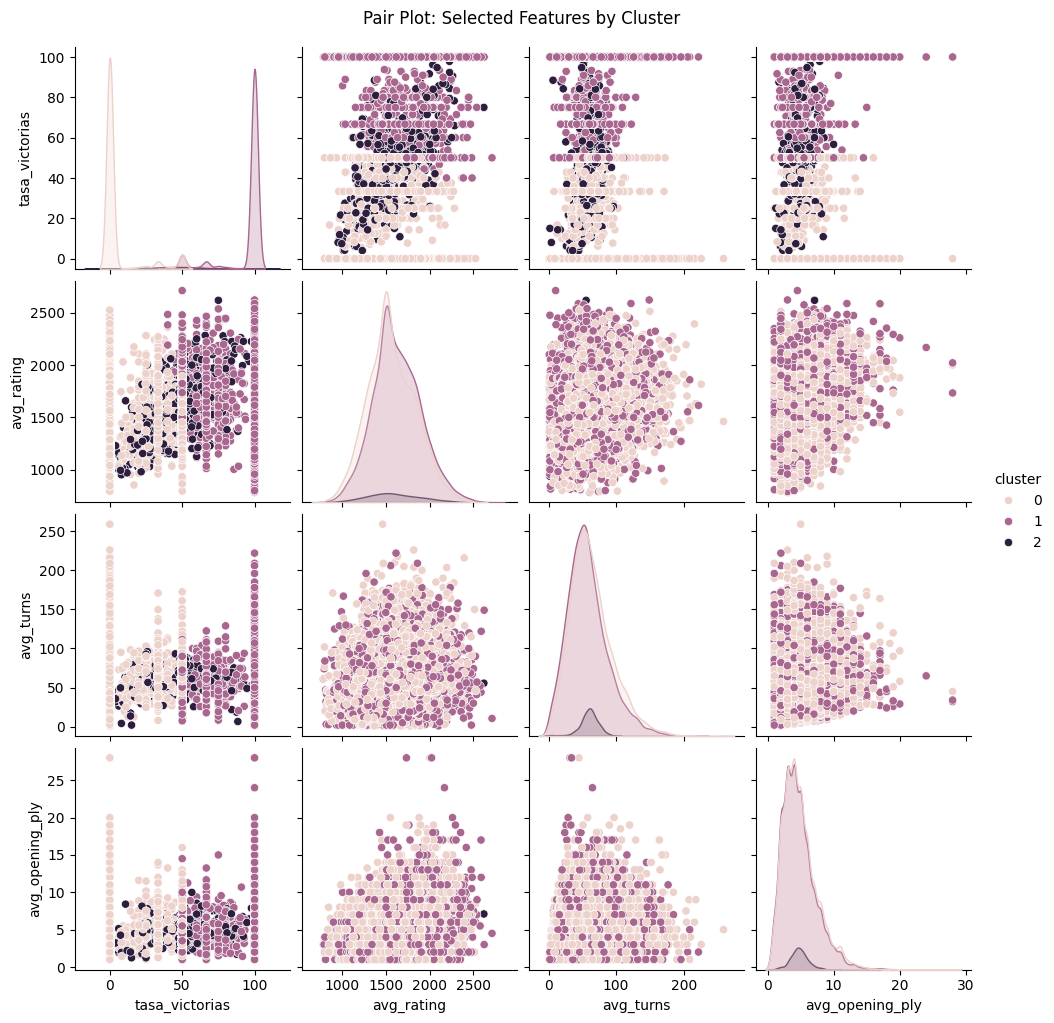

In [152]:
selected_features = ['tasa_victorias', 'avg_rating', 'avg_turns', 'avg_opening_ply' ]
sns.pairplot(caracteristicas_jugadores, hue='cluster', vars=selected_features)
plt.suptitle('Pair Plot: Selected Features by Cluster', y=1.02)
plt.show()


# DBSCAN

## Búsqueda de parámetros óptimos para DBSCAN y método de la silueta

In [2]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score

# Selecciona las columnas relevantes para el clustering
X_for_dbscan = X_for_kmeans

# Escalar los datos para asegurar que todas las características tengan la misma importancia
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_for_dbscan)

# Experimenta con diferentes valores para eps y min_samples
eps_values = [0.5, 1.0, 1.5]
min_samples_values = [5, 10, 15]

for eps in eps_values:
    for min_samples in min_samples_values:
        # crear modelo DBSCAN 
        dbscan_model = DBSCAN(eps=eps, min_samples=min_samples)
        
        # ajustar modelo 
        clusters = dbscan_model.fit_predict(X_scaled)
        
        # calcular la silueta
        silhouette_values = silhouette_samples(X_scaled, clusters)
        
        # calcular la puntuación global de la silueta
        silhouette_avg = silhouette_score(X_scaled, clusters)
        
        # Analizar los resultados, por ejemplo, cuenta el número de clústeres únicos
        unique_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
        print(f"eps={eps}, min_samples={min_samples}: Número de clústeres={unique_clusters}, Silueta media={silhouette_avg}")


eps=0.5, min_samples=5: Número de clústeres=221, Silueta media=-0.30651139305368885
eps=0.5, min_samples=10: Número de clústeres=49, Silueta media=-0.3818020249766372
eps=0.5, min_samples=15: Número de clústeres=11, Silueta media=-0.3913772309852824
eps=1.0, min_samples=5: Número de clústeres=364, Silueta media=0.04725313706970478
eps=1.0, min_samples=10: Número de clústeres=158, Silueta media=-0.1043660534604876
eps=1.0, min_samples=15: Número de clústeres=97, Silueta media=-0.16982708966977575
eps=1.5, min_samples=5: Número de clústeres=400, Silueta media=0.4178430860694276
eps=1.5, min_samples=10: Número de clústeres=189, Silueta media=0.28029205101886145
eps=1.5, min_samples=15: Número de clústeres=103, Silueta media=0.17186312328928935


In [3]:
# Dbscan para 11 clusters
from sklearn.cluster import DBSCAN
dbscan_model = DBSCAN(eps=0.5, min_samples=15)
        
# ajustar modelo
caracteristicas_jugadores['dbscan_cluster_11'] = dbscan_model.fit_predict(X_scaled)

        

## Estadísticas para DBSCAN

In [4]:
import pandas as pd

# Filtrar solo los puntos que no están en el cluster de ruido (-1)
filtered_data_11 = caracteristicas_jugadores[caracteristicas_jugadores['dbscan_cluster_11'] != -1]

# Seleccionar solo columnas numéricas para el cálculo de estadísticas
numeric_columns = filtered_data_11.select_dtypes(include=['number']).columns
cluster_statistics = filtered_data_11.groupby('dbscan_cluster_11')[numeric_columns].mean()

print(cluster_statistics)


                   tasa_victorias  total_partidas   avg_rating  avg_turns  \
dbscan_cluster_11                                                           
0                             0.0        1.121212  1556.469697  57.651515   
1                           100.0        1.161290  1456.532258  32.983871   
2                           100.0        1.031250  1361.250000  42.937500   
3                             0.0        1.200000  1216.660000  54.260000   
4                           100.0        1.166667  1368.822917  55.520833   
5                             0.0        1.050000  1518.500000  44.700000   
6                             0.0        1.054054  1493.162162  58.743243   
7                             0.0        1.266667  1576.000000  62.533333   
8                             0.0        1.066667  1345.333333  51.233333   
9                           100.0        1.062500  1508.125000  47.187500   
10                          100.0        1.312500  1440.281250  49.312500   

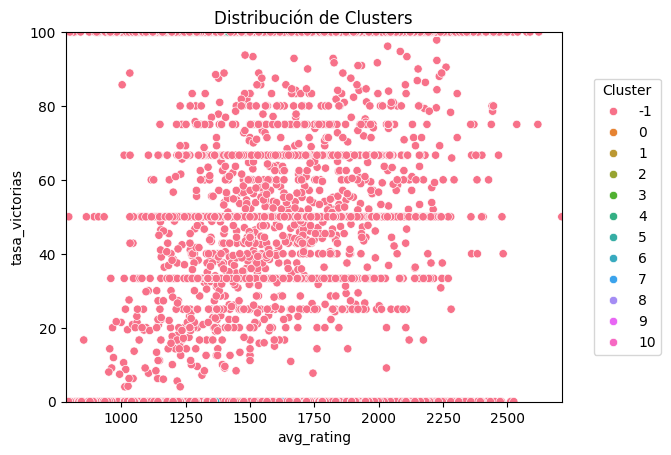

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

caracteristicas_jugadores['dbscan_cluster_11'] = caracteristicas_jugadores['dbscan_cluster_11'].astype('category')

# Visualización de la tasa de victorias en función del rating promedio por cluster
sns.scatterplot(x='avg_rating', y='tasa_victorias', hue='dbscan_cluster_11', data=caracteristicas_jugadores)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 0.5), loc='center left')
plt.title('Distribución de Clusters')
plt.xlim(caracteristicas_jugadores['avg_rating'].min(), caracteristicas_jugadores['avg_rating'].max())
plt.ylim(caracteristicas_jugadores['tasa_victorias'].min(), caracteristicas_jugadores['tasa_victorias'].max())

plt.show()

/tmp/ipykernel_12639/1864774344.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  caracteristicas_sin_outliers['dbscan_cluster_11'] = caracteristicas_sin_outliers['dbscan_cluster_11'].astype('category')


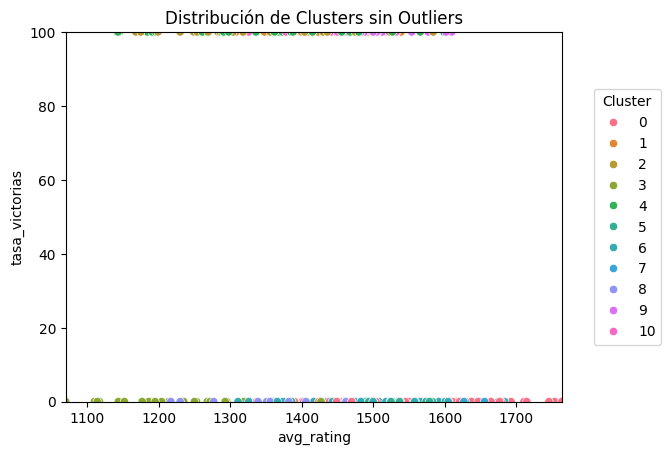

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar solo los puntos que no pertenecen al clúster -1
caracteristicas_sin_outliers = caracteristicas_jugadores[caracteristicas_jugadores['dbscan_cluster_11'] != -1]
caracteristicas_sin_outliers['dbscan_cluster_11'] = caracteristicas_sin_outliers['dbscan_cluster_11'].astype('category')

# Visualización de la tasa de victorias en función del rating promedio por cluster
sns.scatterplot(x='avg_rating', y='tasa_victorias', hue='dbscan_cluster_11', data=caracteristicas_sin_outliers)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 0.5), loc='center left')
plt.title('Distribución de Clusters sin Outliers')
plt.xlim(caracteristicas_sin_outliers['avg_rating'].min(), caracteristicas_sin_outliers['avg_rating'].max())
plt.ylim(caracteristicas_sin_outliers['tasa_victorias'].min(), caracteristicas_sin_outliers['tasa_victorias'].max())

plt.show()

In [6]:
most_frequent_openings = caracteristicas_jugadores.groupby('dbscan_cluster_11')['most_frequent_opening'].value_counts()
filtered_openings = most_frequent_openings[most_frequent_openings != 0]

print(filtered_openings.to_string())


dbscan_cluster_11  most_frequent_opening                                                                      
-1                 Sicilian Defense                                                                               283
                   Scotch Game                                                                                    222
                   French Defense: Knight Variation                                                               210
                   Van't Kruijs Opening                                                                           197
                   Caro-Kann Defense                                                                              185
                   Queen's Pawn Game: Chigorin Variation                                                          180
                   Horwitz Defense                                                                                172
                   Scandinavian Defense: Mieses-Kotroc Variatio

### Nº jugadores en cada cluster

In [7]:
cluster_sizes = caracteristicas_jugadores['dbscan_cluster_11'].value_counts()
print(cluster_sizes)


dbscan_cluster_11
-1     15314
 0        66
 4        48
 6        37
 2        32
 1        31
 3        25
 5        20
 10       16
 9        16
 8        15
 7        15
Name: count, dtype: int64


### Aperturas más frecuentes

In [8]:
most_frequent_openings = caracteristicas_jugadores.groupby('dbscan_cluster_11')['most_frequent_opening'].value_counts()
print(most_frequent_openings)


dbscan_cluster_11  most_frequent_opening                 
-1                 Sicilian Defense                          283
                   Scotch Game                               222
                   French Defense: Knight Variation          210
                   Van't Kruijs Opening                      197
                   Caro-Kann Defense                         185
                                                            ... 
 6                 Queen's Pawn Game: Mason Attack            37
 7                 French Defense: Knight Variation           15
 8                 Queen's Pawn Game: Chigorin Variation      15
 9                 Italian Game: Anti-Fried Liver Defense     16
 10                King's Pawn Game: Leonardis Variation      16
Name: count, Length: 1363, dtype: int64


### Estadísticas para DBSCAN

### kruskal wallis test (DBSCAN)

In [9]:
from scipy.stats import kruskal
selected_columns = ['tasa_victorias', 'total_partidas', 'avg_rating', 'avg_turns', 'avg_opening_ply']
for variable in selected_columns:
    # Perform Kruskal-Wallis test
    stat, p_value = kruskal(*[caracteristicas_jugadores[caracteristicas_jugadores['dbscan_cluster_11'] == cluster][variable] for cluster in set(caracteristicas_jugadores['dbscan_cluster_11'])])
    
    # Print the results
    print(f'Kruskal-Wallis test for {variable}:')
    print(f'Statistic: {stat}')
    print(f'P-value: {p_value}')
    
    # Check for statistical significance (adjust as needed)
    if p_value < 0.05:
        print('The difference across clusters is statistically significant.')
    else:
        print('The difference across clusters is not statistically significant.')
    print('\n')


Kruskal-Wallis test for tasa_victorias:
Statistic: 375.852357673187
P-value: 8.114318562915384e-74
The difference across clusters is statistically significant.


Kruskal-Wallis test for total_partidas:
Statistic: 59.75071418750215
P-value: 1.0315019766473996e-08
The difference across clusters is statistically significant.


Kruskal-Wallis test for avg_rating:
Statistic: 169.56815325438367
P-value: 1.4477393109082522e-30
The difference across clusters is statistically significant.


Kruskal-Wallis test for avg_turns:
Statistic: 63.976576980436896
P-value: 1.6777310783233014e-09
The difference across clusters is statistically significant.


Kruskal-Wallis test for avg_opening_ply:
Statistic: 396.18436204459664
P-value: 3.9503268386864073e-78
The difference across clusters is statistically significant.




In [177]:
from scipy.stats import kruskal
selected_columns = ['tasa_victorias', 'total_partidas', 'avg_rating', 'avg_turns', 'avg_opening_ply']
for variable in selected_columns:
    # Perform Kruskal-Wallis test
    stat, p_value = kruskal(*[caracteristicas_jugadores[caracteristicas_jugadores['dbscan_cluster_400'] == cluster][variable] for cluster in set(caracteristicas_jugadores['dbscan_cluster_400'])])
    print(f'Kruskal-Wallis test for {variable}:')
    print(f'Statistic: {stat}')
    print(f'P-value: {p_value}')
    
    # Check for statistical significance (adjust as needed)
    if p_value < 0.05:
        print('The difference across clusters is statistically significant.')
    else:
        print('The difference across clusters is not statistically significant.')
    print('\n')

Kruskal-Wallis test for tasa_victorias:
Statistic: 2242.253996543431
P-value: 2.9576216501456926e-253
The difference across clusters is statistically significant.


Kruskal-Wallis test for total_partidas:
Statistic: 980.0434260693728
P-value: 1.4741684294334412e-50
The difference across clusters is statistically significant.


Kruskal-Wallis test for avg_rating:
Statistic: 2610.2793563494674
P-value: 0.0
The difference across clusters is statistically significant.


Kruskal-Wallis test for avg_turns:
Statistic: 984.4547774305847
P-value: 3.9578594192692536e-51
The difference across clusters is statistically significant.


Kruskal-Wallis test for avg_opening_ply:
Statistic: 10249.321323977483
P-value: 0.0
The difference across clusters is statistically significant.




## Test chi cuadrado

In [10]:
import pandas as pd
from scipy.stats import chi2_contingency


contingency_table = pd.crosstab(caracteristicas_jugadores['most_frequent_opening'], caracteristicas_jugadores['dbscan_cluster_11'])

# Realizar la prueba chi-cuadrado
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Imprimir resultados
print(f'Chi-cuadrado: {chi2}')
print(f'Valor p: {p_value}')


Chi-cuadrado: 24174.638321979284
Valor p: 0.0


In [178]:
import pandas as pd
from scipy.stats import chi2_contingency


contingency_table = pd.crosstab(caracteristicas_jugadores['most_frequent_opening'], caracteristicas_jugadores['dbscan_cluster_400'])

# Realizar la prueba chi-cuadrado
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Imprimir resultados
print(f'Chi-cuadrado: {chi2}')
print(f'Valor p: {p_value}')

Chi-cuadrado: 4041555.5275530084
Valor p: 0.0


/tmp/ipykernel_12639/3910763576.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  caracteristicas_sin_outliers['dbscan_cluster_11'] = caracteristicas_sin_outliers['dbscan_cluster_11'].astype('category')


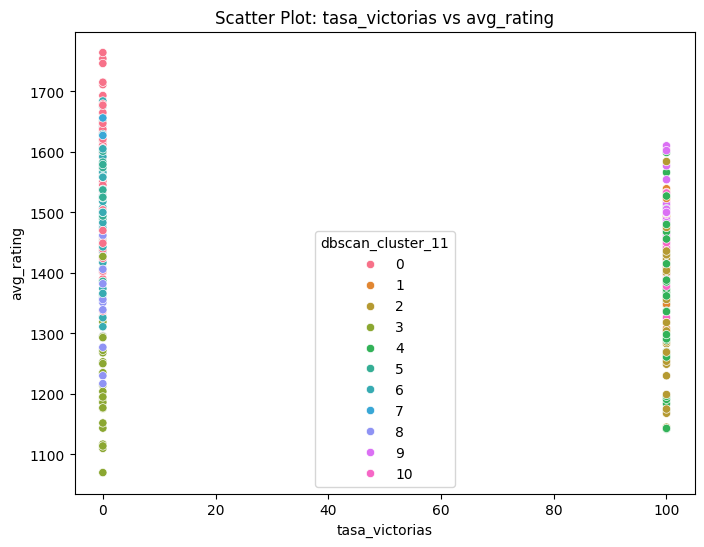

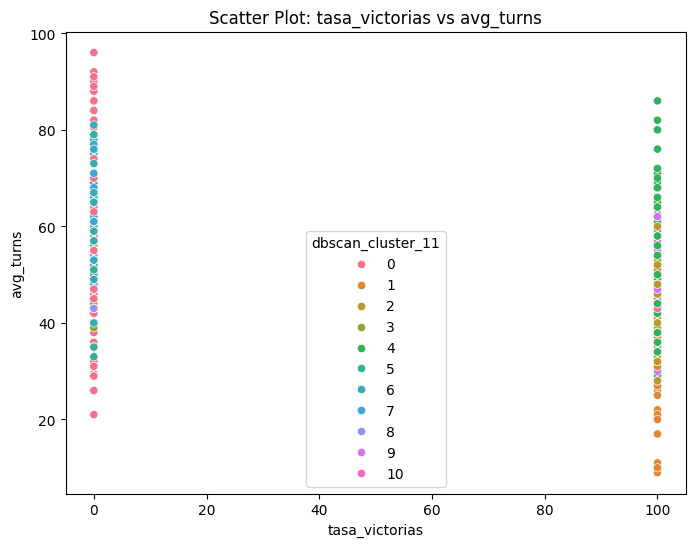

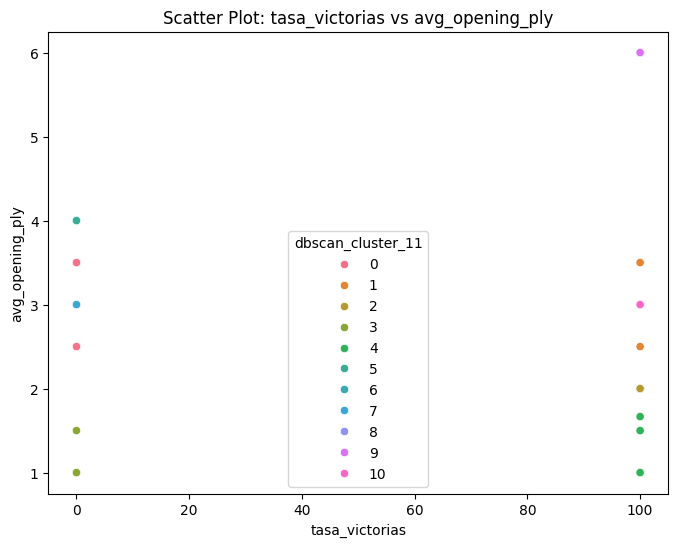

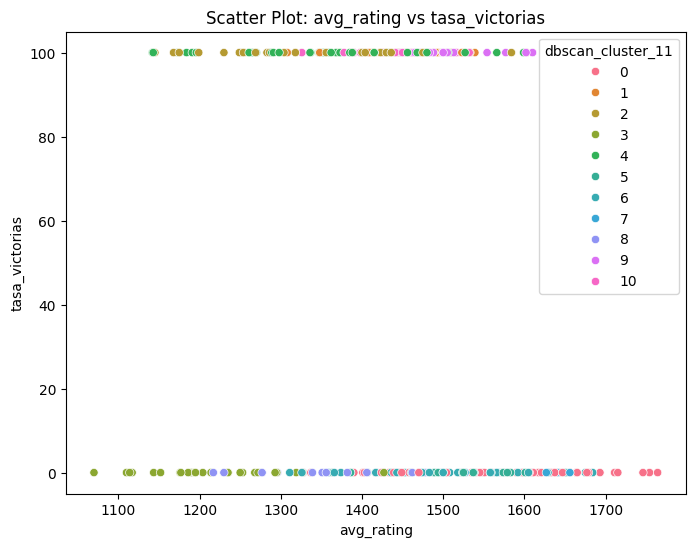

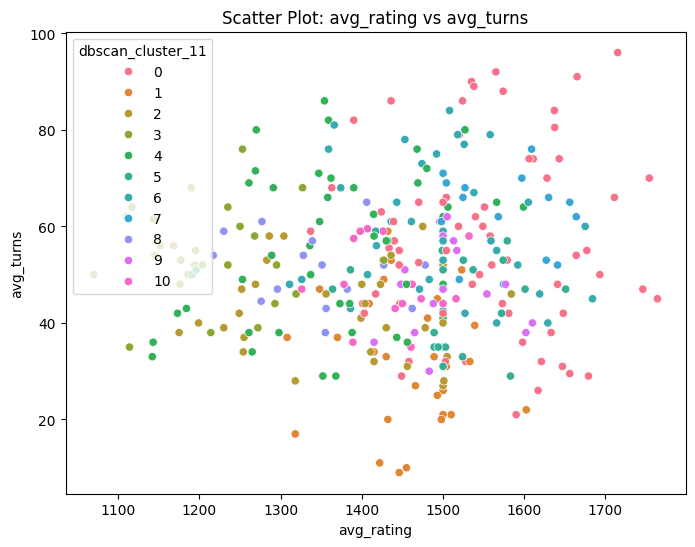

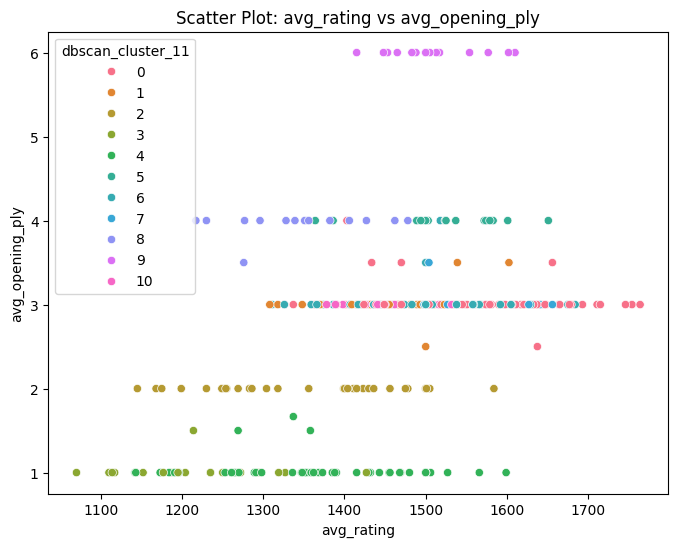

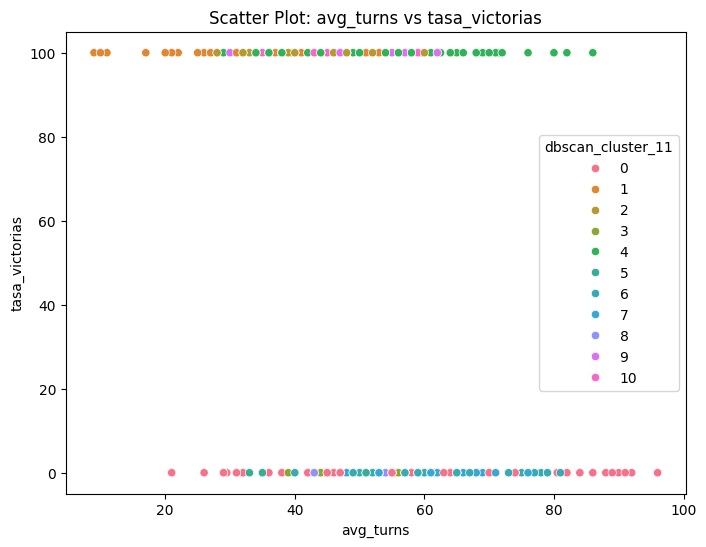

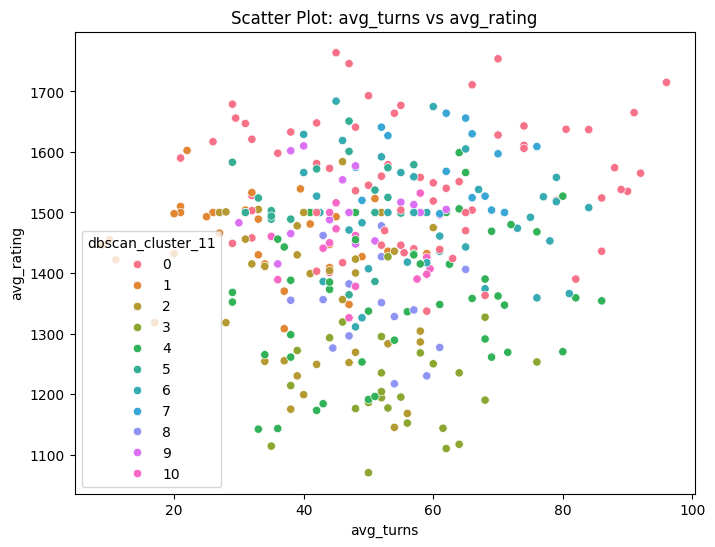

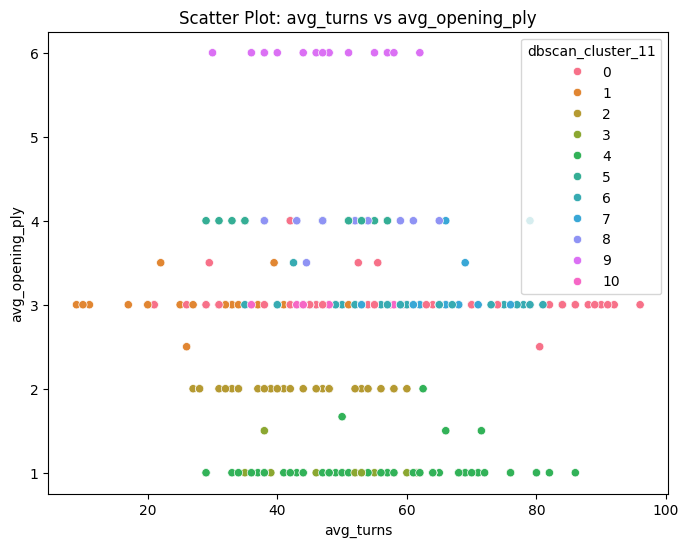

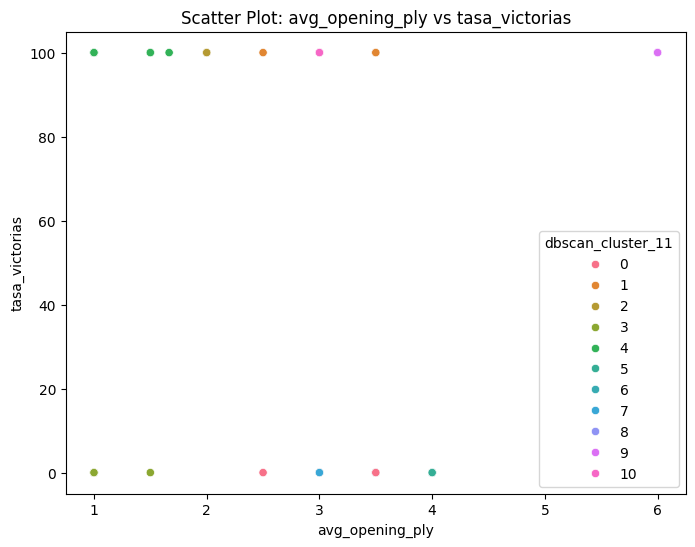

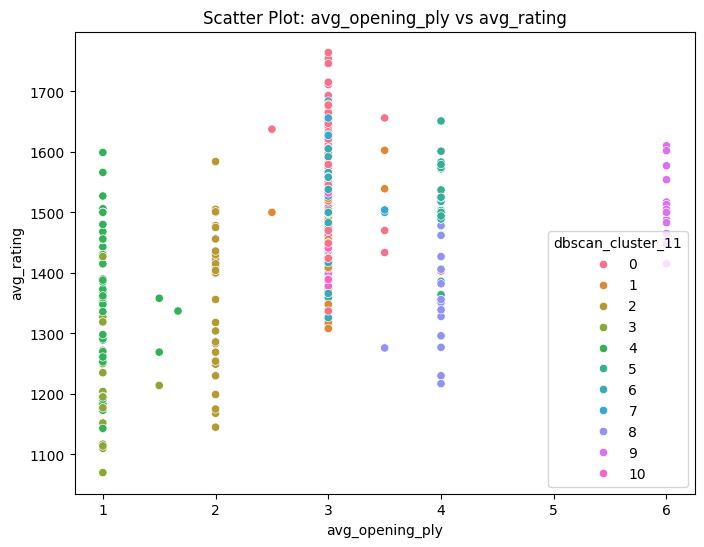

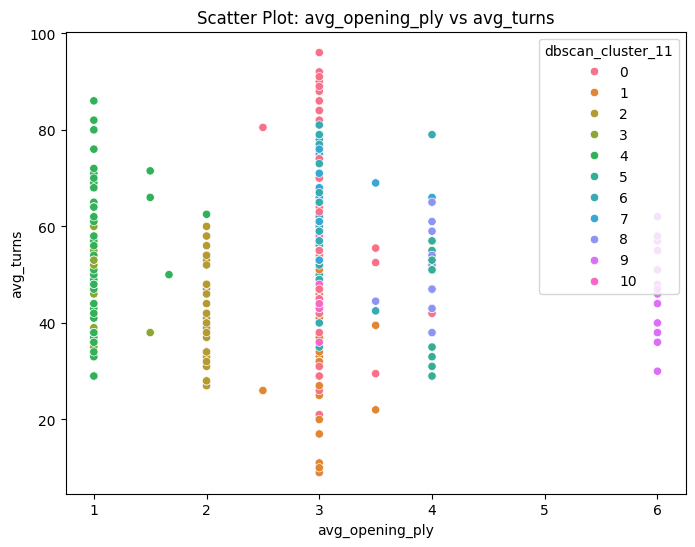

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt


selected_features = ['tasa_victorias', 'avg_rating', 'avg_turns', 'avg_opening_ply']
# Filtrar solo los puntos que no pertenecen al clúster -1
caracteristicas_sin_outliers = caracteristicas_jugadores[caracteristicas_jugadores['dbscan_cluster_11'] != -1]
caracteristicas_sin_outliers['dbscan_cluster_11'] = caracteristicas_sin_outliers['dbscan_cluster_11'].astype('category')
# Crear gráficos individuales para cada par de características
for feature1 in selected_features:
    for feature2 in selected_features:
        if feature1 != feature2:
            plt.figure(figsize=(8, 6))
            sns.scatterplot(x=feature1, y=feature2, hue='dbscan_cluster_11', data=caracteristicas_sin_outliers)
            plt.title(f'Scatter Plot: {feature1} vs {feature2}')
            plt.show()


/tmp/ipykernel_13283/2055880456.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  caracteristicas_sin_outliers['dbscan_cluster_11'] = caracteristicas_sin_outliers['dbscan_cluster_11'].astype('category')


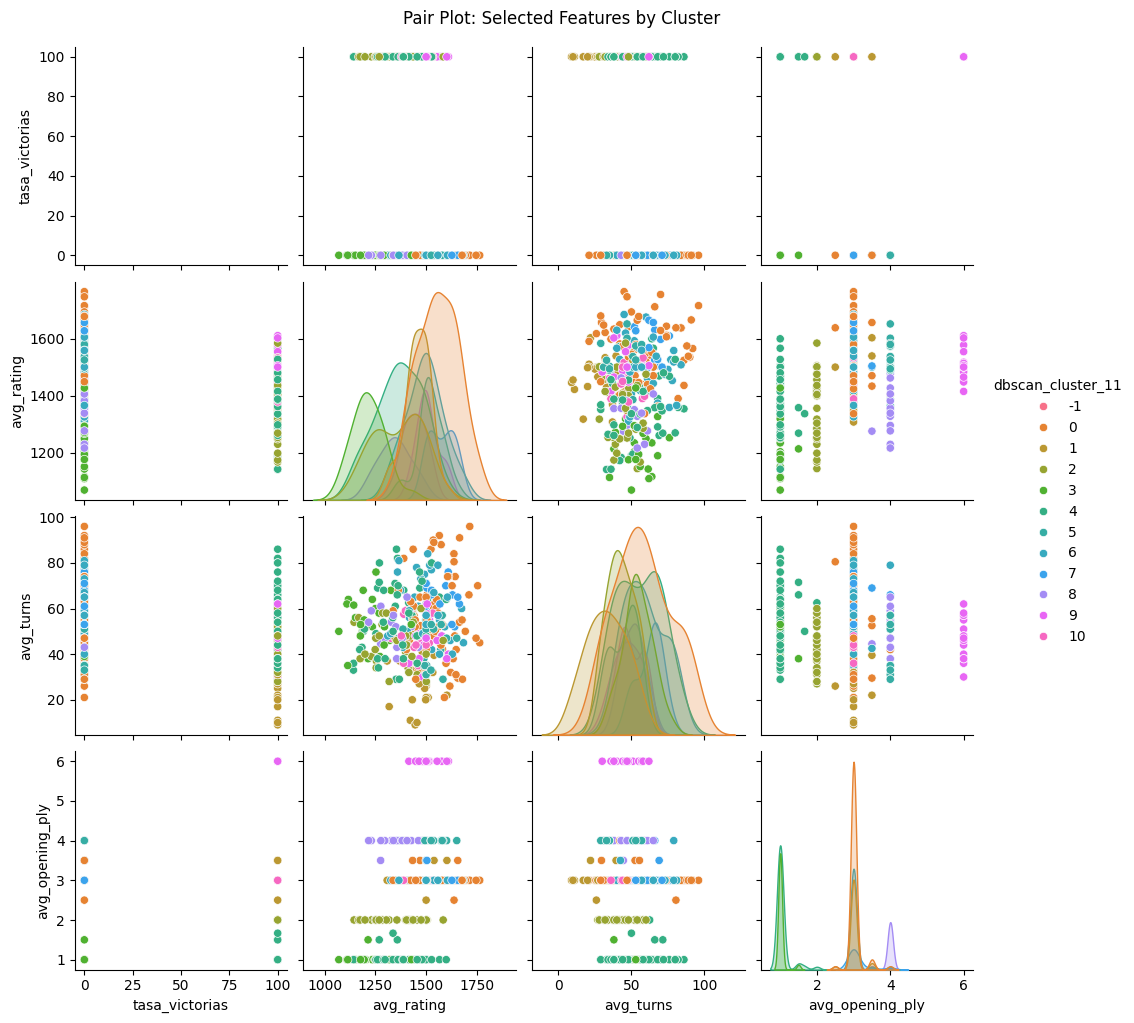

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
selected_features = ['tasa_victorias', 'avg_rating', 'avg_turns', 'avg_opening_ply' ]

caracteristicas_sin_outliers = caracteristicas_jugadores[caracteristicas_jugadores['dbscan_cluster_11'] != -1]
caracteristicas_sin_outliers['dbscan_cluster_11'] = caracteristicas_sin_outliers['dbscan_cluster_11'].astype('category')

sns.pairplot(caracteristicas_sin_outliers, hue='dbscan_cluster_11', vars=selected_features)
plt.suptitle('Pair Plot: Selected Features by Cluster', y=1.02)
plt.show()

# Hierarchical clustering

### Optimal number of clusters

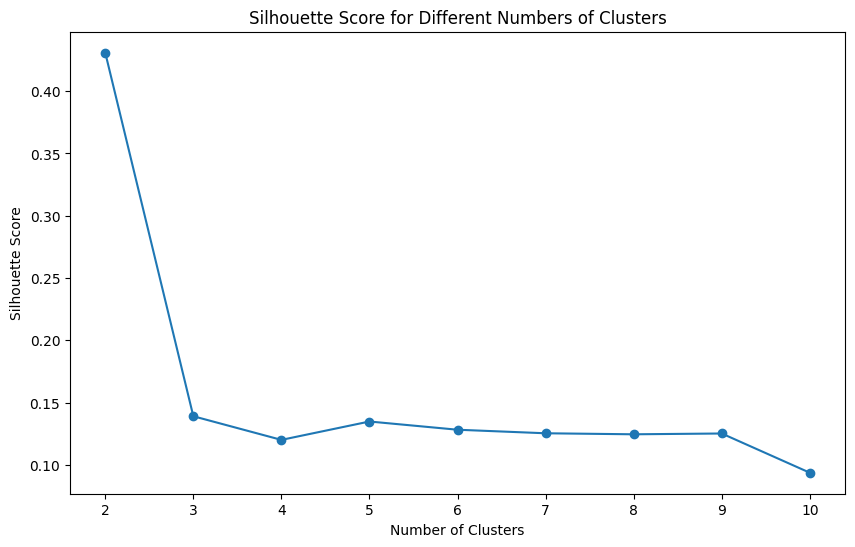

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import pdist  

X = X_for_kmeans

# Calculate the linkage matrix using 'ward' linkage
Z = linkage(X, method='ward')

# Evaluate silhouette scores for different numbers of clusters
silhouette_scores = []

for n_clusters in range(2, 11):
    labels = fcluster(Z, t=n_clusters, criterion='maxclust')
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


### Dendogram method

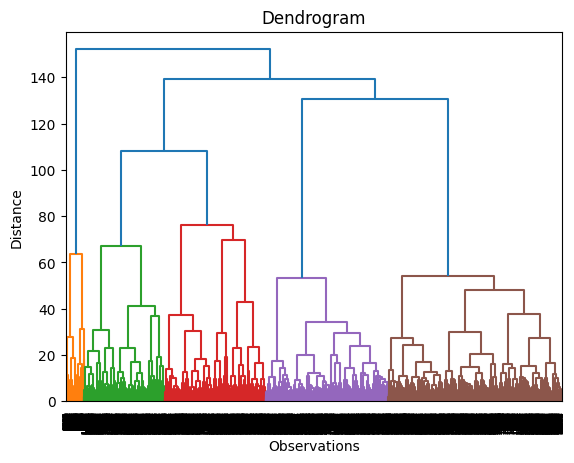

In [33]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Perform hierarchical clustering
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
plt.show()


In [39]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

X_for_hierarchical = X_for_kmeans
# 4. Aplicar Clustering Jerárquico a las características seleccionadas
hierarchical_model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
caracteristicas_jugadores['hierarchical_cluster_5'] = hierarchical_model.fit_predict(X_for_hierarchical)

# Visualizar los resultados o realizar análisis adicional según sea necesario
print(caracteristicas_jugadores[['hierarchical_cluster_5', *numeric_columns, *categorical_columns]])

/home/angela/.local/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


       hierarchical_cluster_5  tasa_victorias  total_partidas  avg_rating  \
0                           2      100.000000               1     1500.00   
1                           3        0.000000               3     1333.75   
2                           1      100.000000               1     1496.00   
3                           2      100.000000               5     1405.40   
4                           1       66.666667               3     1524.00   
...                       ...             ...             ...         ...   
15630                       3        0.000000               1     1201.00   
15631                       3        0.000000               1     1142.00   
15632                       2      100.000000               1     1196.00   
15633                       3        0.000000               1     1286.00   
15634                       2      100.000000               1     1339.00   

       avg_turns  avg_opening_ply                      most_frequent_openin

In [54]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

X_for_hierarchical = X_for_kmeans
# Aplicar Clustering Jerárquico a las características seleccionadas
hierarchical_model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
caracteristicas_jugadores['hierarchical_cluster_2'] = hierarchical_model.fit_predict(X_for_hierarchical)
print(caracteristicas_jugadores[['hierarchical_cluster_2', *numeric_columns, *categorical_columns]])

/home/angela/.local/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


       hierarchical_cluster_2  tasa_victorias  total_partidas  avg_rating  \
0                           0      100.000000               1     1500.00   
1                           0        0.000000               3     1333.75   
2                           0      100.000000               1     1496.00   
3                           0      100.000000               5     1405.40   
4                           0       66.666667               3     1524.00   
...                       ...             ...             ...         ...   
15630                       0        0.000000               1     1201.00   
15631                       0        0.000000               1     1142.00   
15632                       0      100.000000               1     1196.00   
15633                       0        0.000000               1     1286.00   
15634                       0      100.000000               1     1339.00   

       avg_turns  avg_opening_ply                      most_frequent_openin

### Nº jugadores en cada cluster

In [103]:
cluster_sizes = caracteristicas_jugadores['hierarchical_cluster_5'].value_counts()
print(cluster_sizes)


hierarchical_cluster_5
2    5460
3    3855
0    3187
1    2544
4     589
Name: count, dtype: int64


In [104]:
cluster_sizes = caracteristicas_jugadores['hierarchical_cluster_2'].value_counts()
print(cluster_sizes)


hierarchical_cluster_2
0    15046
1      589
Name: count, dtype: int64


### Aperturas más frecuentes

In [105]:
hierarchical_cluster_column = 'hierarchical_cluster_5'
most_frequent_opening_column = 'most_frequent_opening'
# Find the most frequent opening for each hierarchical cluster
most_frequent_opening_per_cluster = caracteristicas_jugadores.groupby(hierarchical_cluster_column)[most_frequent_opening_column].apply(lambda x: x.value_counts().idxmax())
print(most_frequent_opening_per_cluster)




hierarchical_cluster_5
0    French Defense: Exchange Variation
1                  Van't Kruijs Opening
2                      Sicilian Defense
3                      Sicilian Defense
4                           Scotch Game
Name: most_frequent_opening, dtype: object


In [106]:
hierarchical_cluster_column = 'hierarchical_cluster_2'
most_frequent_opening_column = 'most_frequent_opening'

# Find the most frequent opening for each hierarchical cluster
most_frequent_opening_per_cluster = caracteristicas_jugadores.groupby(hierarchical_cluster_column)[most_frequent_opening_column].apply(lambda x: x.value_counts().idxmax())
print(most_frequent_opening_per_cluster)


hierarchical_cluster_2
0    Sicilian Defense
1         Scotch Game
Name: most_frequent_opening, dtype: object


In [107]:
most_frequent_openings = caracteristicas_jugadores.groupby('hierarchical_cluster_5')['most_frequent_opening'].value_counts()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(most_frequent_openings)


hierarchical_cluster_5  most_frequent_opening                                                                      
0                       French Defense: Exchange Variation                                                              49
                        French Defense: Knight Variation                                                                48
                        Sicilian Defense: Najdorf Variation                                                             40
                        Sicilian Defense                                                                                35
                        Indian Game                                                                                     32
                        French Defense: Advance Variation |  Paulsen Attack                                             30
                        Scotch Game                                                                                     28
                       

In [108]:
most_frequent_openings = caracteristicas_jugadores.groupby('hierarchical_cluster_2')['most_frequent_opening'].value_counts()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(most_frequent_openings)


hierarchical_cluster_2  most_frequent_opening                                                                      
0                       Sicilian Defense                                                                               279
                        Van't Kruijs Opening                                                                           259
                        Sicilian Defense: Bowdler Attack                                                               225
                        French Defense: Knight Variation                                                               210
                        Scotch Game                                                                                    204
                        Queen's Pawn Game: Chigorin Variation                                                          187
                        Queen's Pawn Game: Mason Attack                                                                180
                       

### Histogramas

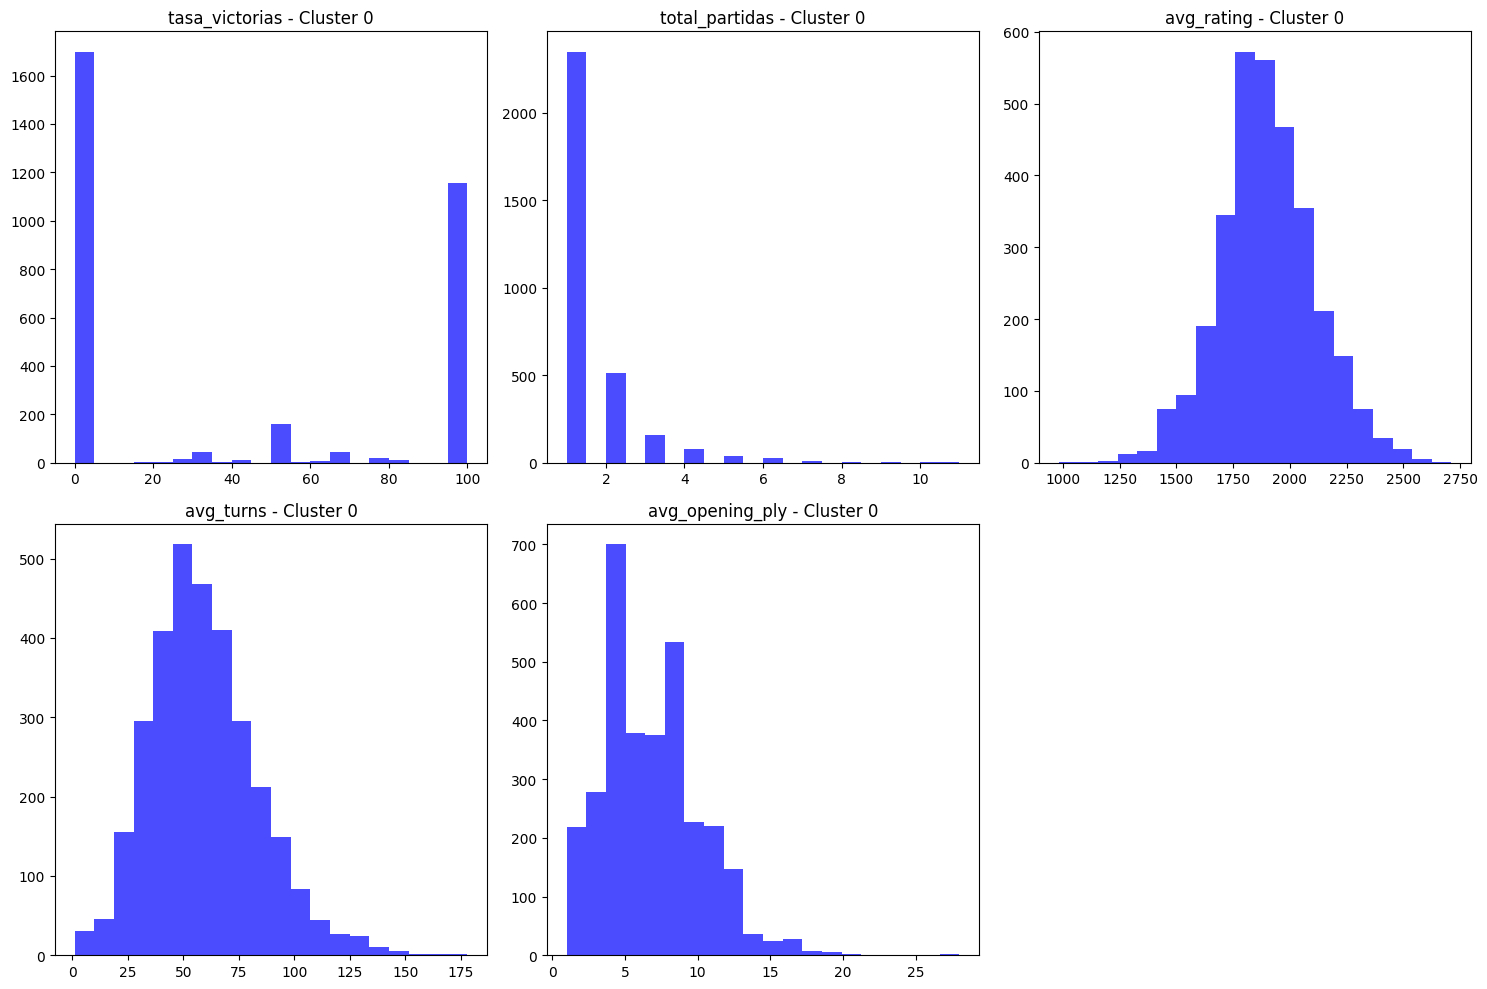

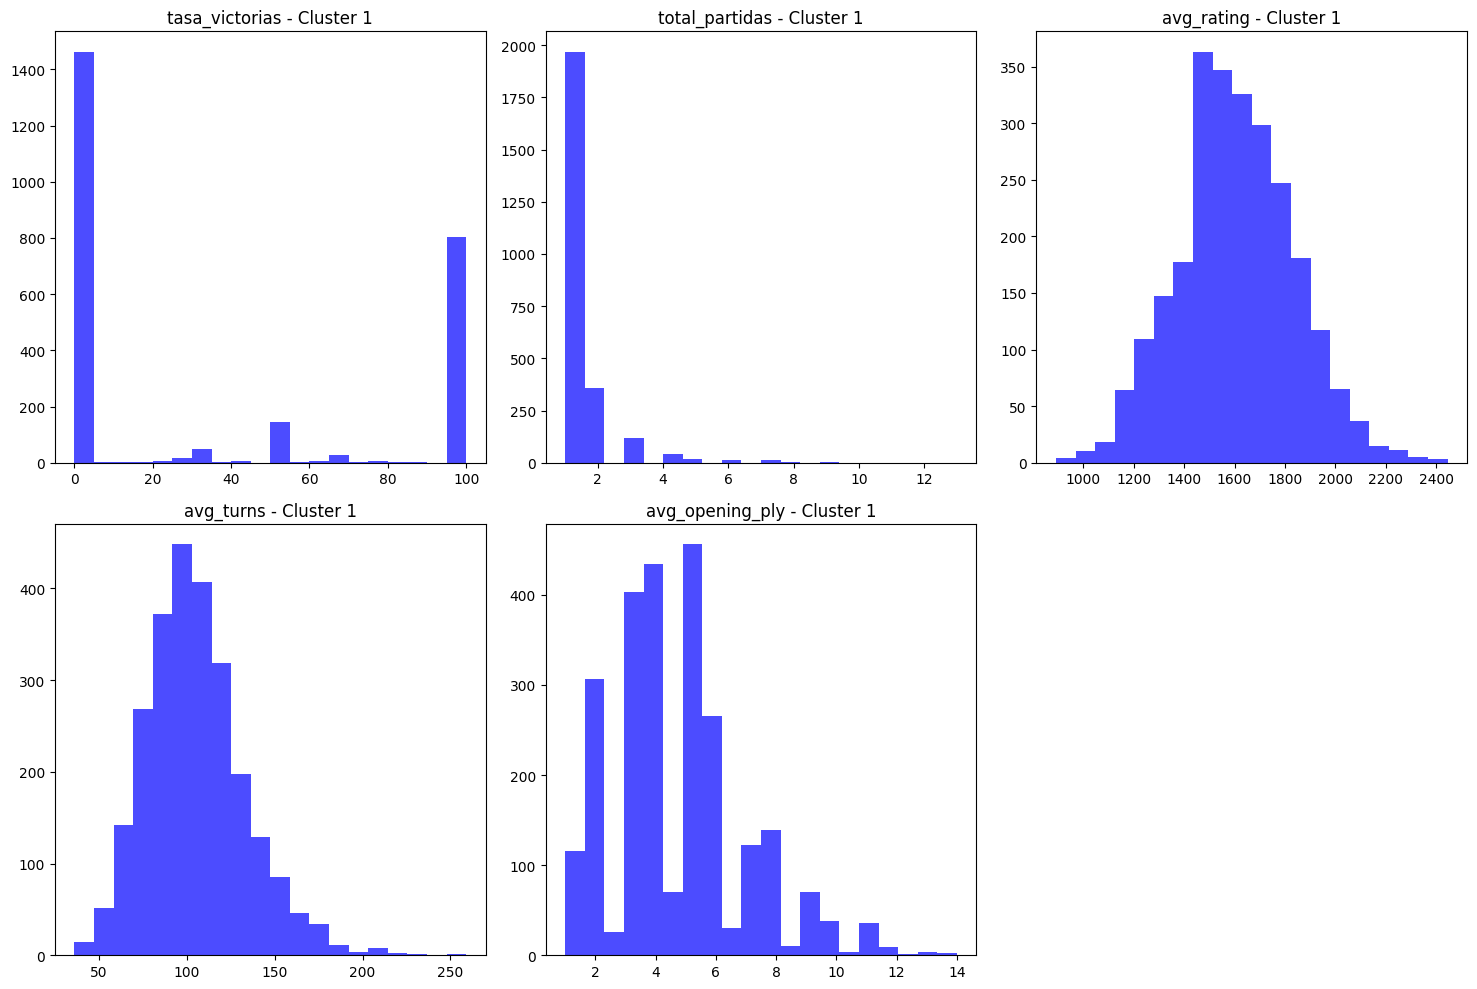

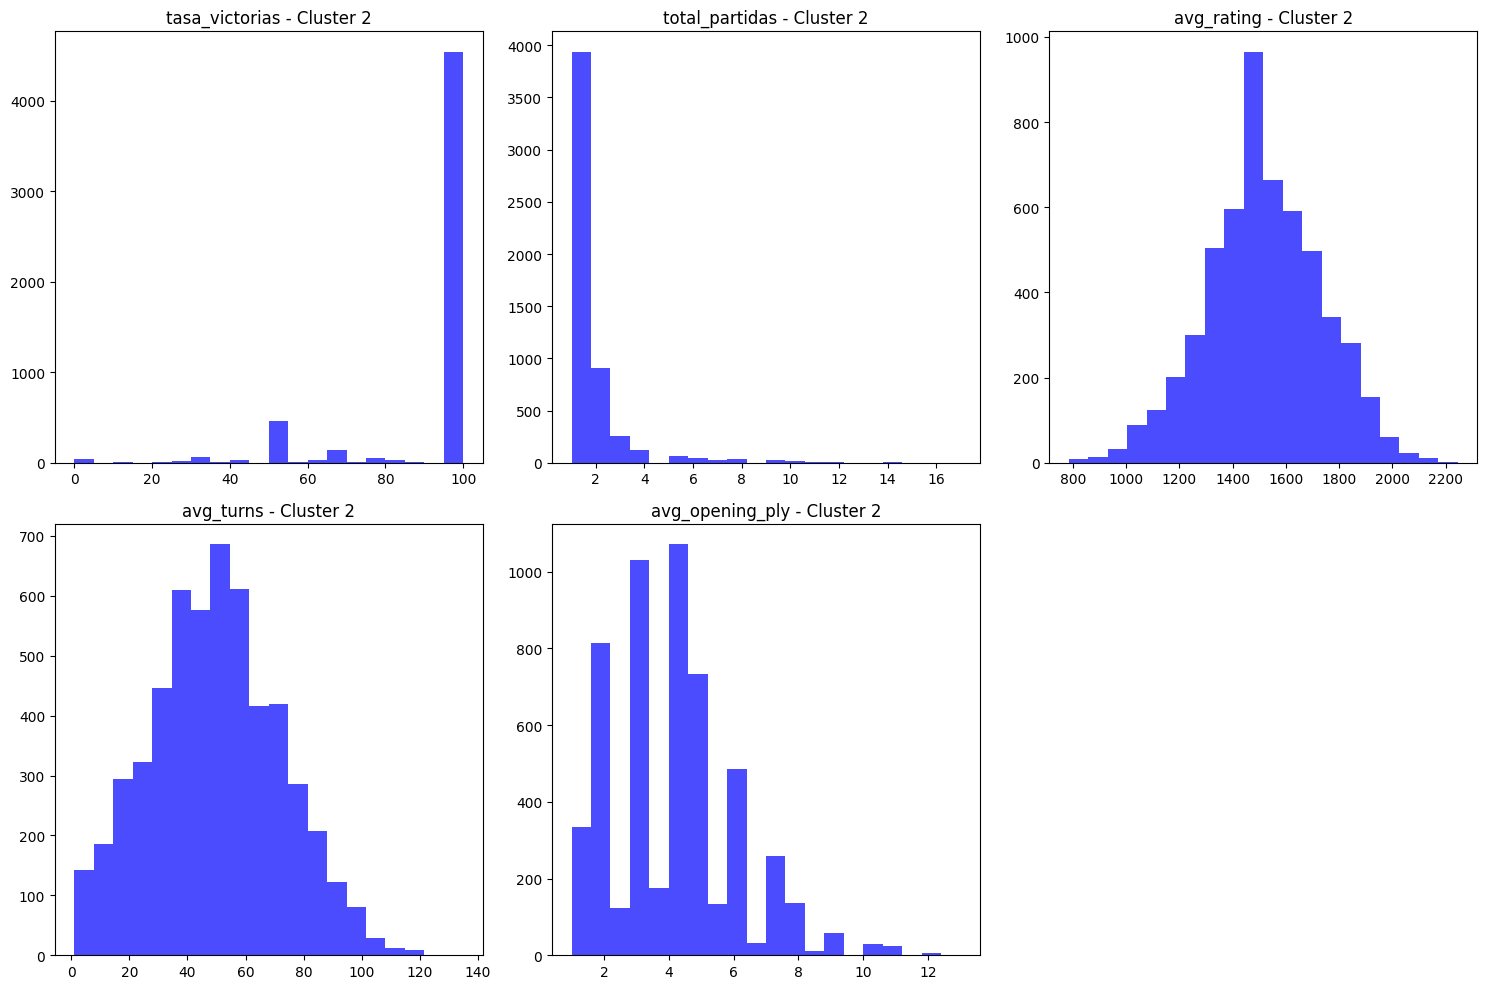

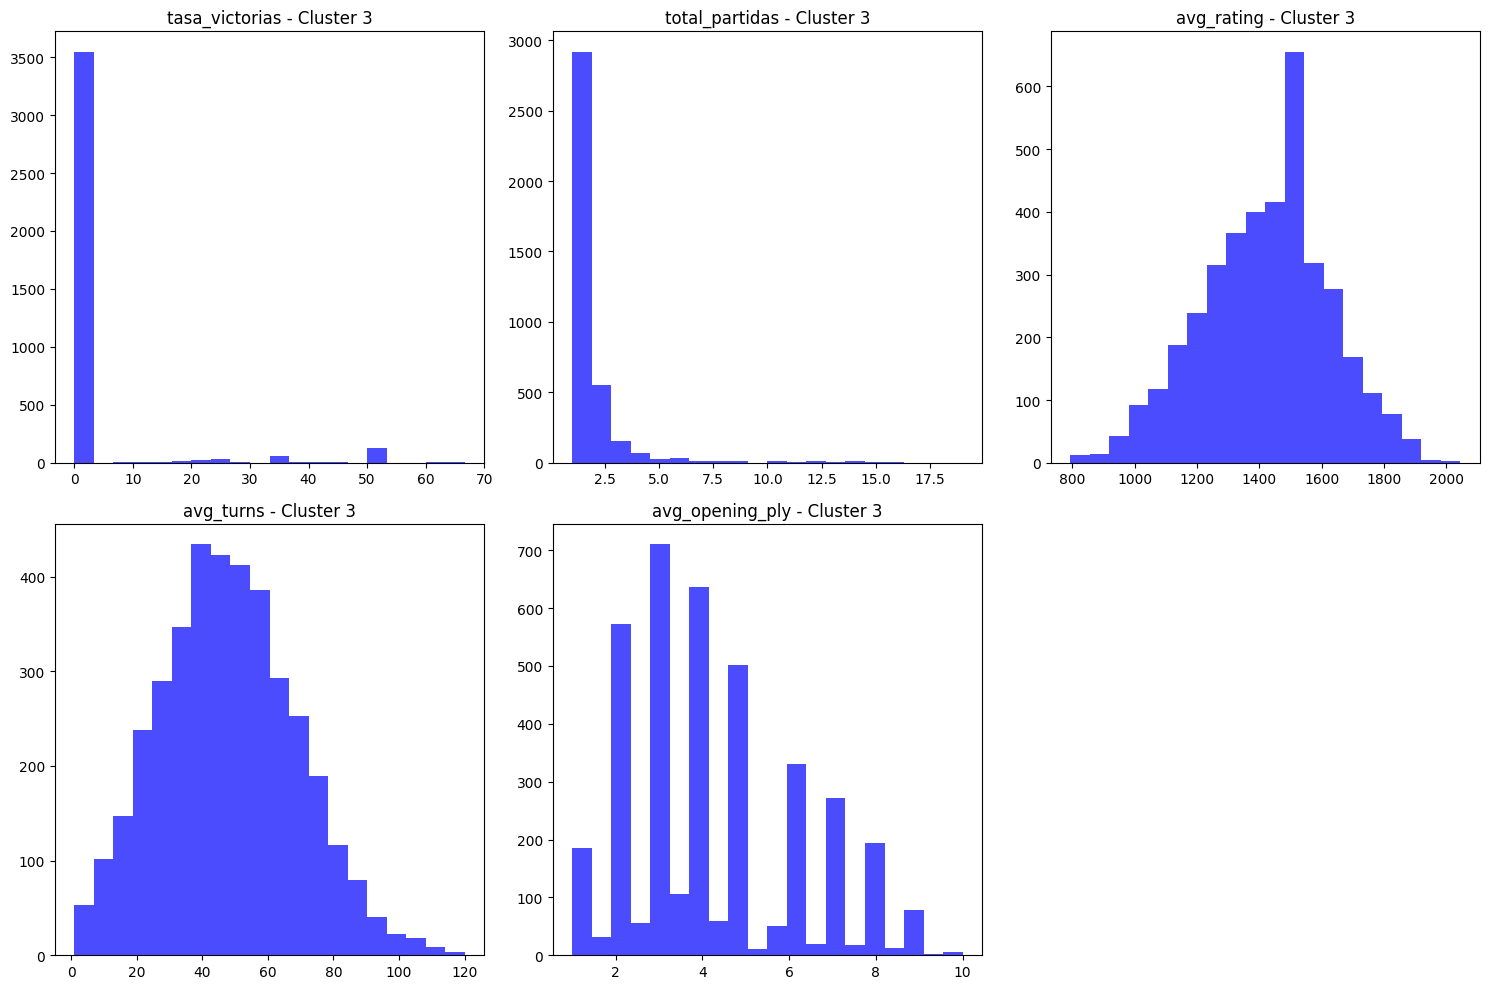

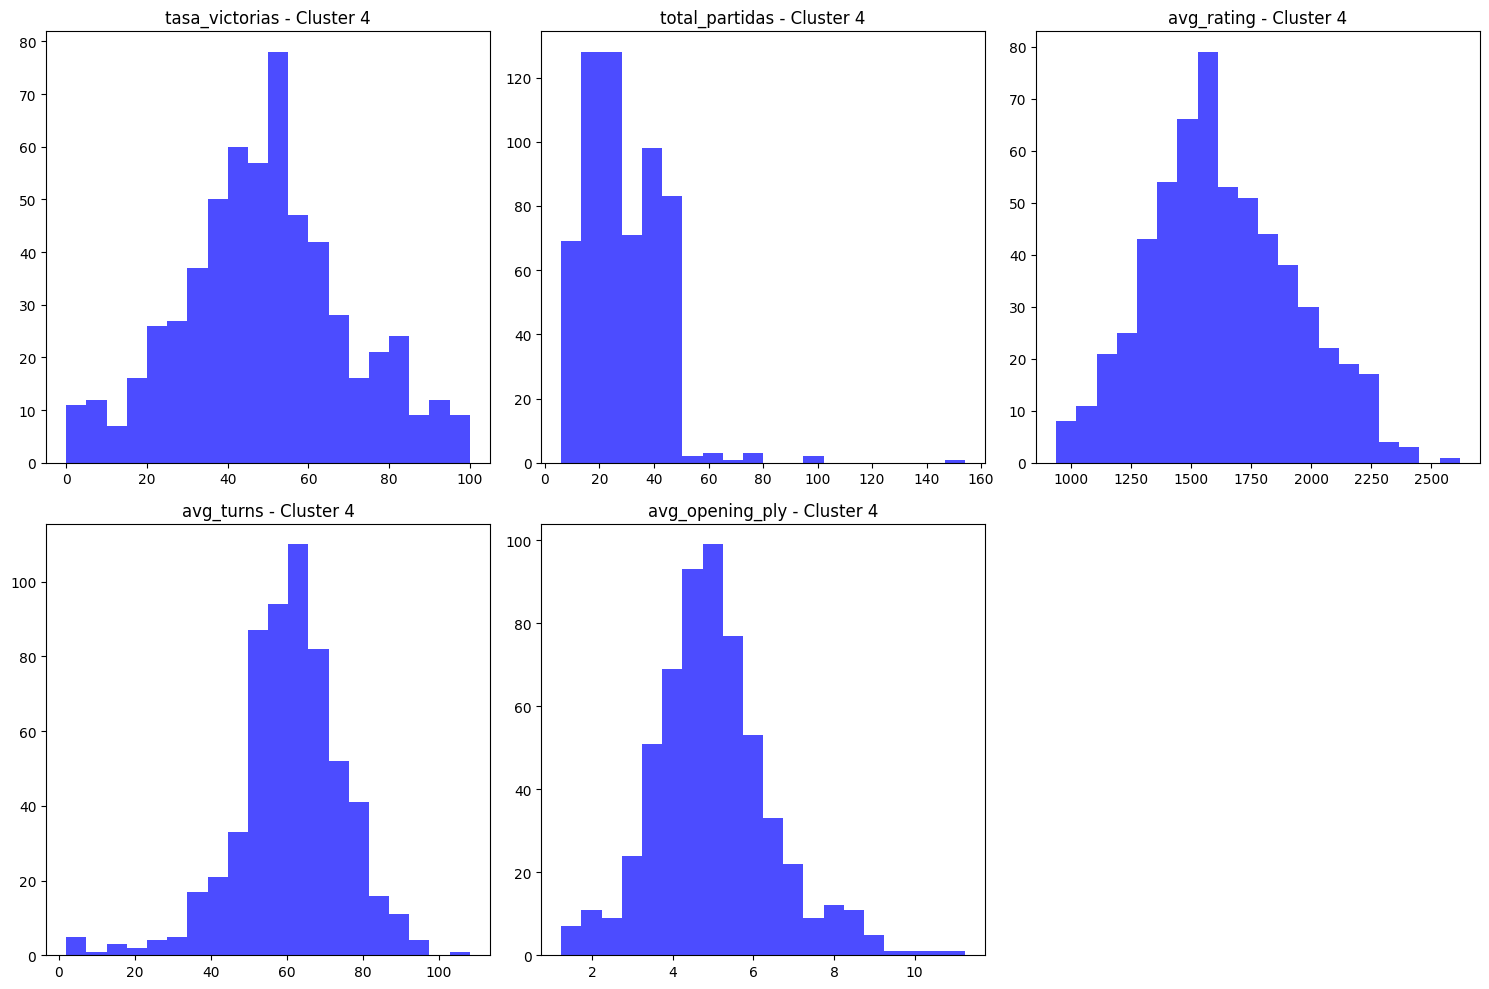

In [111]:
import matplotlib.pyplot as plt

numeric_columns = ['tasa_victorias', 'total_partidas', 'avg_rating', 'avg_turns', 'avg_opening_ply']
NUM_CLUSTERS = 5
for cluster in range(NUM_CLUSTERS):
    datos_cluster = caracteristicas_jugadores[caracteristicas_jugadores['hierarchical_cluster_5'] == cluster]
    plt.figure(figsize=(15, 10))
    rows, cols = 2, 3
    i = 1
    for column in numeric_columns:
        plt.subplot(rows, cols, i)
        plt.hist(datos_cluster[column], bins=20, color='blue', alpha=0.7)
        plt.title(f'{column} - Cluster {cluster}')
        i += 1

    plt.tight_layout()
    plt.show()

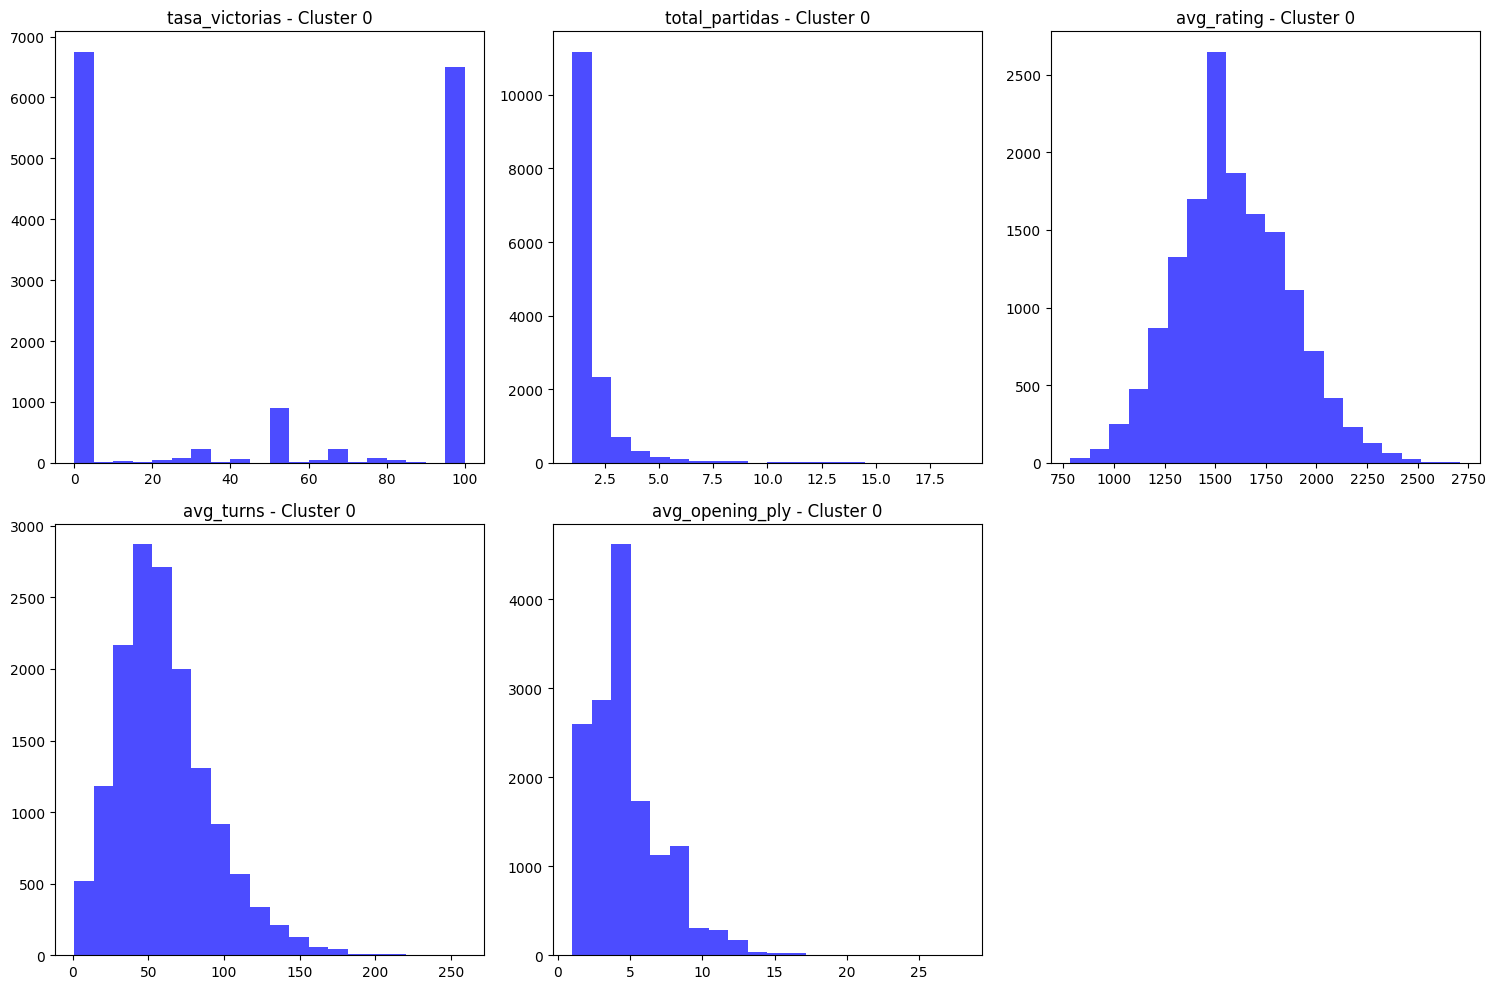

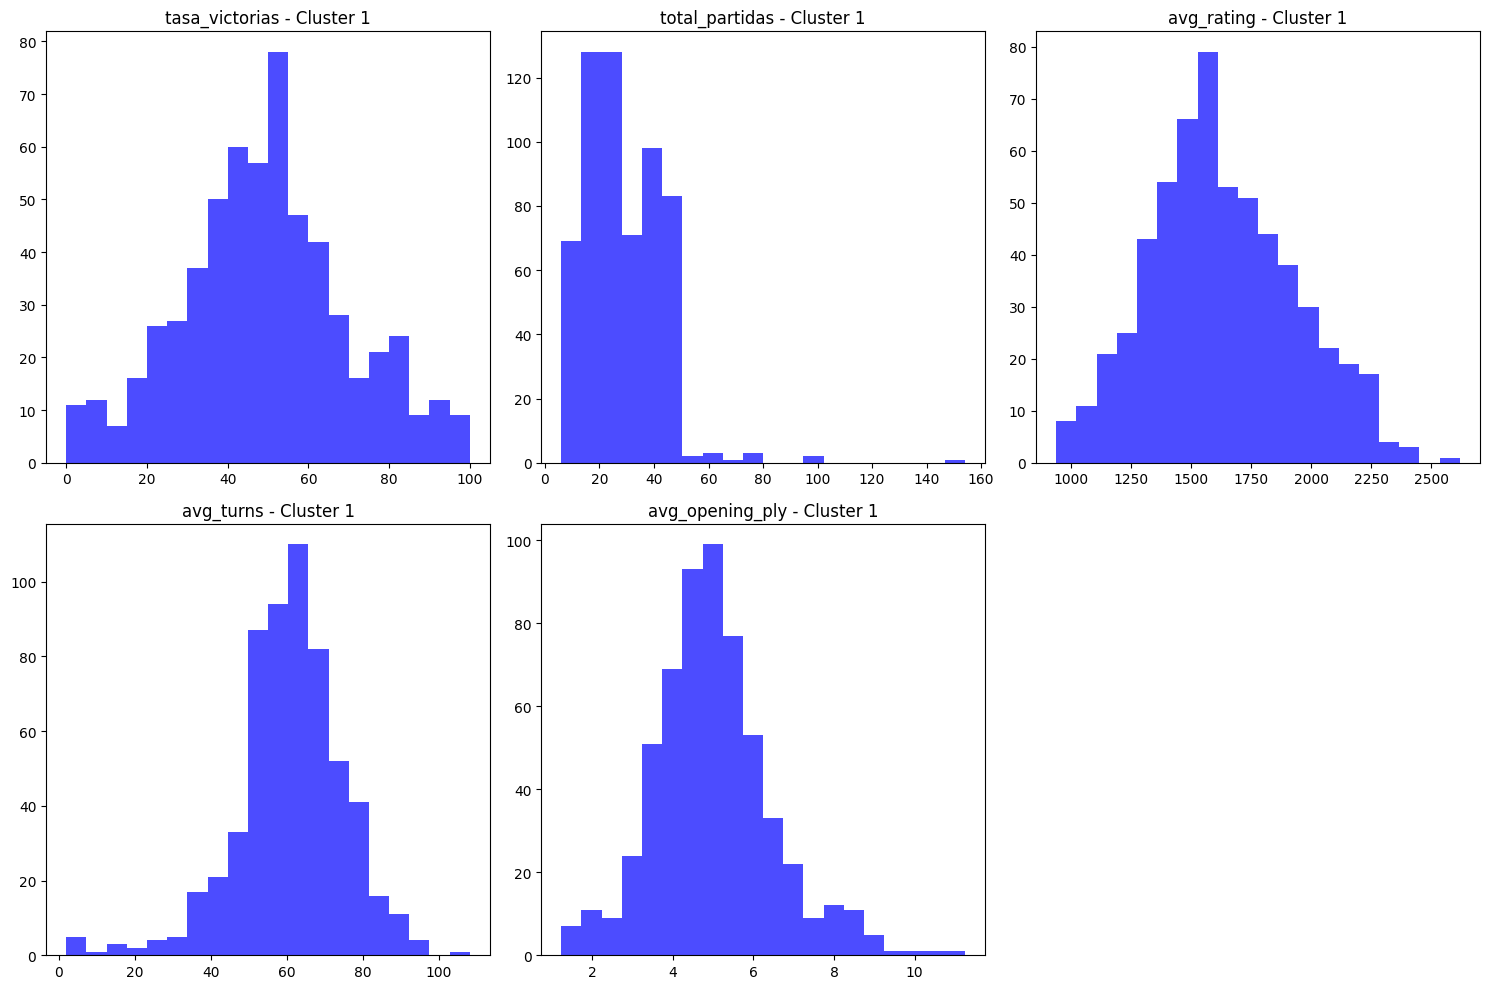

In [113]:
import matplotlib.pyplot as plt

numeric_columns = ['tasa_victorias', 'total_partidas', 'avg_rating', 'avg_turns', 'avg_opening_ply']
NUM_CLUSTERS = 2
for cluster in range(NUM_CLUSTERS):
    datos_cluster = caracteristicas_jugadores[caracteristicas_jugadores['hierarchical_cluster_2'] == cluster]
    plt.figure(figsize=(15, 10))
    rows, cols = 2, 3
    i = 1
    for column in numeric_columns:
        plt.subplot(rows, cols, i)
        plt.hist(datos_cluster[column], bins=20, color='blue', alpha=0.7)
        plt.title(f'{column} - Cluster {cluster}')
        i += 1

    plt.tight_layout()
    plt.show()

### Kruskall-wallis test

Para las variables que no tienen una distribución normal

In [41]:
from scipy.stats import kruskal
selected_columns = ['tasa_victorias', 'total_partidas', 'avg_opening_ply']
for variable in selected_columns:
    # Perform Kruskal-Wallis test
    stat, p_value = kruskal(*[caracteristicas_jugadores[caracteristicas_jugadores['hierarchical_cluster_5'] == cluster][variable] for cluster in set(caracteristicas_jugadores['hierarchical_cluster_5'])])
    print(f'Kruskal-Wallis test for {variable}:')
    print(f'Statistic: {stat}')
    print(f'P-value: {p_value}')
    
    if p_value < 0.05:
        print('The difference across clusters is statistically significant.')
    else:
        print('The difference across clusters is not statistically significant.')
    print('\n')


Kruskal-Wallis test for tasa_victorias:
Statistic: 8635.889341847616
P-value: 0.0
The difference across clusters is statistically significant.


Kruskal-Wallis test for total_partidas:
Statistic: 2710.799852954183
P-value: 0.0
The difference across clusters is statistically significant.


Kruskal-Wallis test for avg_opening_ply:
Statistic: 2069.3066680993875
P-value: 0.0
The difference across clusters is statistically significant.




In [43]:
from scipy.stats import kruskal
selected_columns = ['tasa_victorias', 'total_partidas', 'avg_opening_ply']
for variable in selected_columns:
    # Perform Kruskal-Wallis test
    stat, p_value = kruskal(*[caracteristicas_jugadores[caracteristicas_jugadores['hierarchical_cluster_2'] == cluster][variable] for cluster in set(caracteristicas_jugadores['hierarchical_cluster_2'])])
    print(f'Kruskal-Wallis test for {variable}:')
    print(f'Statistic: {stat}')
    print(f'P-value: {p_value}')
    
    if p_value < 0.05:
        print('The difference across clusters is statistically significant.')
    else:
        print('The difference across clusters is not statistically significant.')
    print('\n')

Kruskal-Wallis test for tasa_victorias:
Statistic: 0.2664455623337442
P-value: 0.6057261472814032
The difference across clusters is not statistically significant.


Kruskal-Wallis test for total_partidas:
Statistic: 2683.6391587534526
P-value: 0.0
The difference across clusters is statistically significant.


Kruskal-Wallis test for avg_opening_ply:
Statistic: 41.347450948275274
P-value: 1.2743753275252037e-10
The difference across clusters is statistically significant.




## Test ANOVA

In [44]:
from scipy.stats import f_oneway

# Realizar el test ANOVA para características numéricas
NUM_CLUSTERS = 5
anova_result = f_oneway(*[caracteristicas_jugadores[caracteristicas_jugadores['hierarchical_cluster_5'] == i]['avg_rating'] for i in range(NUM_CLUSTERS)])
print("Resultados del test ANOVA:")
print(anova_result)

Resultados del test ANOVA:
F_onewayResult(statistic=2363.6041038989256, pvalue=0.0)


In [45]:
from scipy.stats import f_oneway

# Realizar el test ANOVA para características numéricas
NUM_CLUSTERS = 2
anova_result = f_oneway(*[caracteristicas_jugadores[caracteristicas_jugadores['hierarchical_cluster_2'] == i]['avg_rating'] for i in range(NUM_CLUSTERS)])
print("Resultados del test ANOVA:")
print(anova_result)

Resultados del test ANOVA:
F_onewayResult(statistic=12.032771968667463, pvalue=0.0005241406072064237)


In [46]:
from scipy.stats import f_oneway
NUM_CLUSTERS = 5
# Realizar el test ANOVA para características numéricas
anova_result = f_oneway(*[caracteristicas_jugadores[caracteristicas_jugadores['hierarchical_cluster_5'] == i]['avg_turns'] for i in range(NUM_CLUSTERS)])
print("Resultados del test ANOVA:")
print(anova_result)

Resultados del test ANOVA:
F_onewayResult(statistic=2948.0284369954375, pvalue=0.0)


In [47]:
from scipy.stats import f_oneway
NUM_CLUSTERS = 2
# Realizar el test ANOVA para características numéricas
anova_result = f_oneway(*[caracteristicas_jugadores[caracteristicas_jugadores['hierarchical_cluster_2'] == i]['avg_turns'] for i in range(NUM_CLUSTERS)])
print("Resultados del test ANOVA:")
print(anova_result)

Resultados del test ANOVA:
F_onewayResult(statistic=0.05859195786165553, pvalue=0.8087385848608302)


## Test chi cuadrado

In [55]:
import pandas as pd
from scipy.stats import chi2_contingency


contingency_table = pd.crosstab(caracteristicas_jugadores['most_frequent_opening'], caracteristicas_jugadores['hierarchical_cluster_5'])

# Realizar la prueba chi-cuadrado
chi2, p_value, _, _ = chi2_contingency(contingency_table)
print(f'Chi-cuadrado: {chi2}')
print(f'Valor p: {p_value}')

Chi-cuadrado: 10616.01777446359
Valor p: 0.0


In [56]:
import pandas as pd
from scipy.stats import chi2_contingency


contingency_table = pd.crosstab(caracteristicas_jugadores['most_frequent_opening'], caracteristicas_jugadores['hierarchical_cluster_2'])

# Realizar la prueba chi-cuadrado
chi2, p_value, _, _ = chi2_contingency(contingency_table)
print(f'Chi-cuadrado: {chi2}')
print(f'Valor p: {p_value}')

Chi-cuadrado: 1208.6367920641942
Valor p: 0.9976610044746267


## Visualización

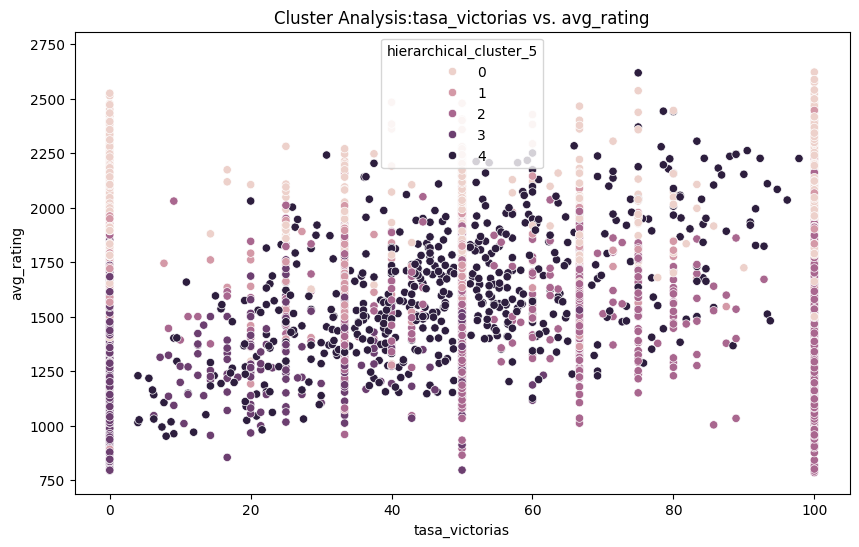

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='tasa_victorias', y='avg_rating', hue='hierarchical_cluster_5', data=caracteristicas_jugadores)
plt.title('Cluster Analysis:tasa_victorias vs. avg_rating')
plt.xlabel('tasa_victorias')
plt.ylabel('avg_rating')
plt.show()


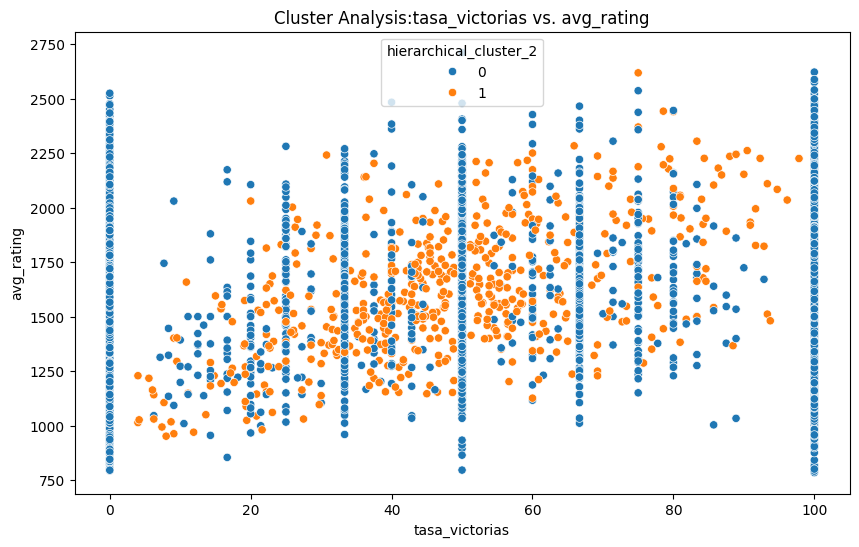

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='tasa_victorias', y='avg_rating', hue='hierarchical_cluster_2', data=caracteristicas_jugadores)
plt.title('Cluster Analysis:tasa_victorias vs. avg_rating')
plt.xlabel('tasa_victorias')
plt.ylabel('avg_rating')
plt.show()


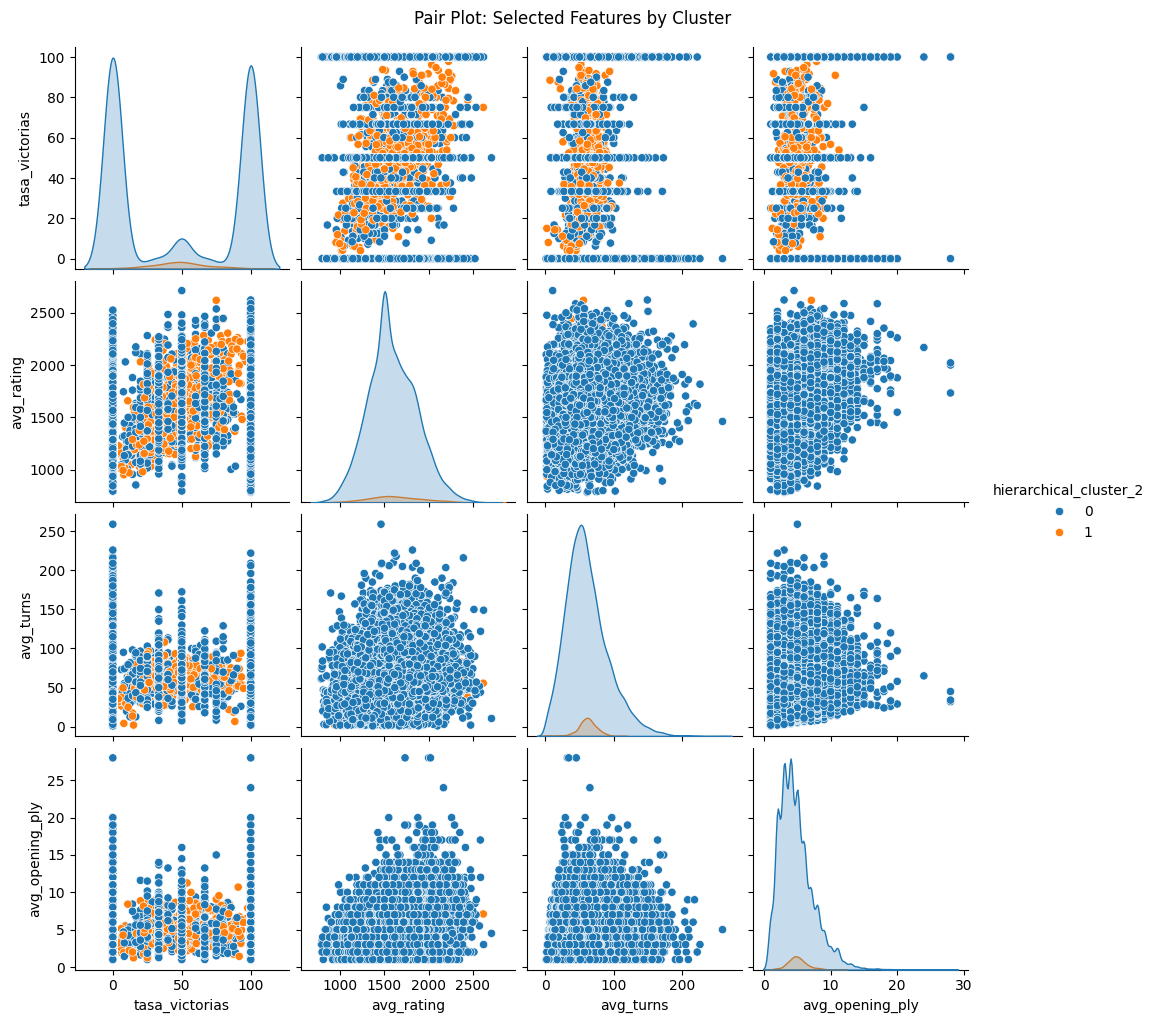

In [53]:
# Example: Pair plot for selected features
selected_features = ['tasa_victorias', 'avg_rating', 'avg_turns', 'avg_opening_ply' ]
sns.pairplot(caracteristicas_jugadores, hue='hierarchical_cluster_2', vars=selected_features)
plt.suptitle('Pair Plot: Selected Features by Cluster', y=1.02)
plt.show()

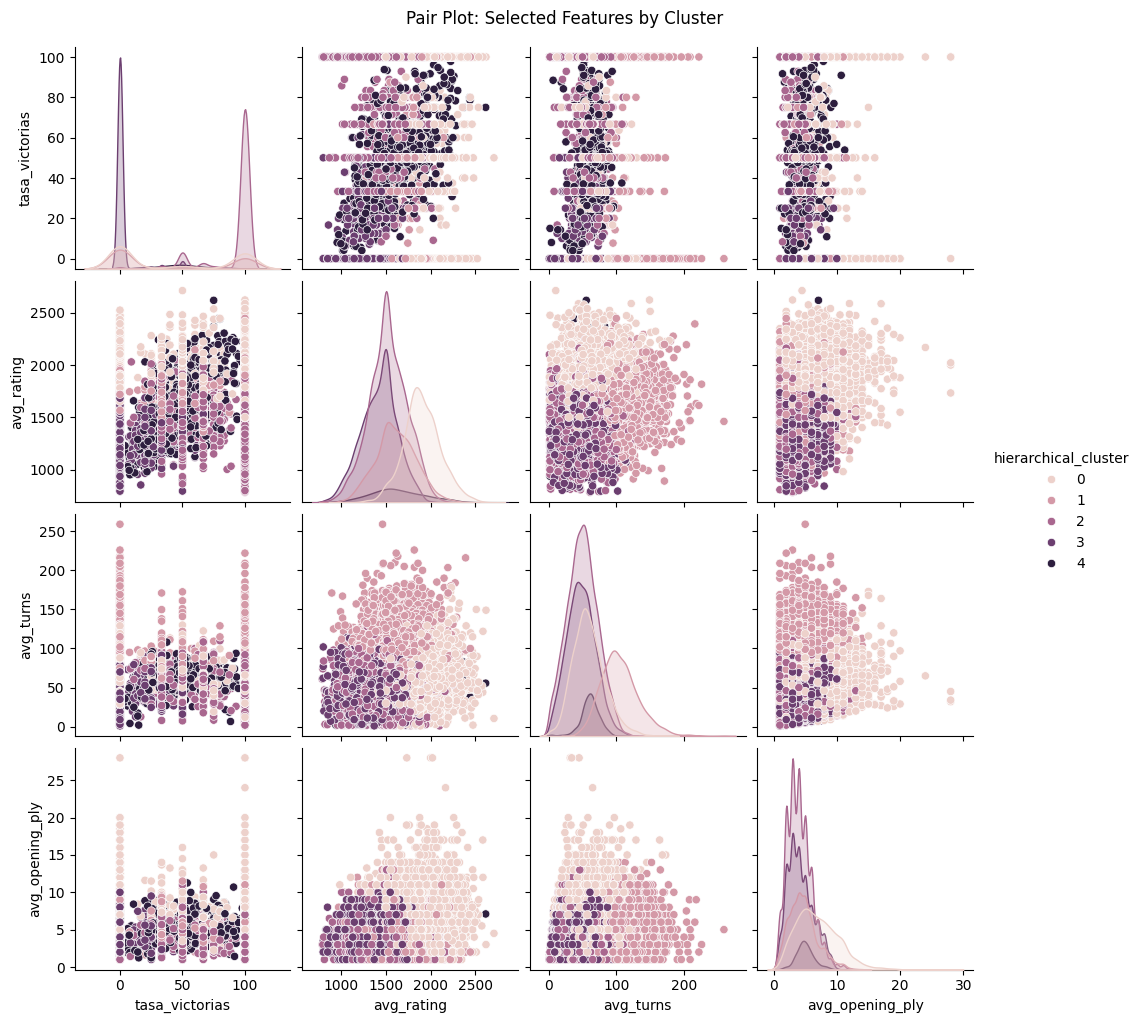

In [95]:
# Example: Pair plot for selected features
selected_features = ['tasa_victorias', 'avg_rating', 'avg_turns', 'avg_opening_ply' ]
sns.pairplot(caracteristicas_jugadores, hue='hierarchical_cluster_5', vars=selected_features)
plt.suptitle('Pair Plot: Selected Features by Cluster', y=1.02)
plt.show()